In [1]:
!pip install matplotlib

In [2]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install statsmodels
!pip install plotly
!pip install plotly_express


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
import os
os.getcwd()

path = "c:\\Users\\esthelle.kuissu\\OneDrive - Exiom Partners\\Documents\\Code_rapport_stage\\Bases sinistres"

datac = pd.read_csv(path + "\\bdd_sinistres_concat.csv", sep=";", encoding="latin1")


C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_25948\3271511903.py:6: DtypeWarning: Columns (24,40,83,105) have mixed types. Specify dtype option on import or set low_memory=False.
  datac = pd.read_csv(path + "\\bdd_sinistres_concat.csv", sep=";", encoding="latin1")


In [6]:
datac = pd.read_csv(path + "\\bdd_sinistres_concat.csv", sep=";", encoding="latin1")

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_25948\999665098.py:1: DtypeWarning: Columns (24,40,83,105) have mixed types. Specify dtype option on import or set low_memory=False.
  datac = pd.read_csv(path + "\\bdd_sinistres_concat.csv", sep=";", encoding="latin1")


In [7]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977293 entries, 0 to 977292
Columns: 115 entries, cle_sin to date_permis_f
dtypes: bool(2), float64(55), int64(4), object(54)
memory usage: 844.4+ MB


In [8]:
datac.head()

,cle_sin,date_evt,date_evt_decla,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,...,DPT_REP,_RESEAU_,NB_PIECE_REMPLACEE,NB_PIECE_REPAREE,veh_info_manquante,date_ord,date_sortie_veh_imputee,annee_sortie_veh,date_nais_f,date_permis_f
0,191840439C A 018,02/01/2019,04/01/2019,O,N,4,29/06/1987,09/01/2015,PRO,N,...,16,Non agréé,8.0,2.0,False,735605.0,False,2015,13/01/1934,04/05/1960
1,191840048C A 001,01/01/2019,02/01/2019,N,N,4,10/11/2018,2023-12-31 00:00:00,PRO,N,...,49,R3,10.0,2.0,False,734509.0,False,2012,09/11/2000,09/11/2018
2,191840501C A 010,03/01/2019,04/01/2019,O,N,4,13/07/2016,03/04/2018,PRO,N,...,44,Non agréé,3.0,2.0,False,734509.0,False,2012,05/10/1951,06/10/1969
3,191840759C A 001,06/01/2019,07/01/2019,O,N,4,25/10/2015,2023-12-31 00:00:00,PRO,N,...,49,Indet,7.0,2.0,False,732683.0,False,2007,27/05/1978,05/09/1997
4,191840075AV A 003,01/01/2019,02/01/2019,O,N,4,10/06/2015,11/03/2016,PRO,N,...,#,Indet,2.0,1.0,False,734869.0,False,2013,13/05/1971,05/02/1990


On va uniquement travailler sur les sinistres qui ont un rapport d'expertise et our lesqueles une décision de reparation a été prise.

In [9]:
datac.head()

,cle_sin,date_evt,date_evt_decla,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,...,DPT_REP,_RESEAU_,NB_PIECE_REMPLACEE,NB_PIECE_REPAREE,veh_info_manquante,date_ord,date_sortie_veh_imputee,annee_sortie_veh,date_nais_f,date_permis_f
0,191840439C A 018,02/01/2019,04/01/2019,O,N,4,29/06/1987,09/01/2015,PRO,N,...,16,Non agréé,8.0,2.0,False,735605.0,False,2015,13/01/1934,04/05/1960
1,191840048C A 001,01/01/2019,02/01/2019,N,N,4,10/11/2018,2023-12-31 00:00:00,PRO,N,...,49,R3,10.0,2.0,False,734509.0,False,2012,09/11/2000,09/11/2018
2,191840501C A 010,03/01/2019,04/01/2019,O,N,4,13/07/2016,03/04/2018,PRO,N,...,44,Non agréé,3.0,2.0,False,734509.0,False,2012,05/10/1951,06/10/1969
3,191840759C A 001,06/01/2019,07/01/2019,O,N,4,25/10/2015,2023-12-31 00:00:00,PRO,N,...,49,Indet,7.0,2.0,False,732683.0,False,2007,27/05/1978,05/09/1997
4,191840075AV A 003,01/01/2019,02/01/2019,O,N,4,10/06/2015,11/03/2016,PRO,N,...,#,Indet,2.0,1.0,False,734869.0,False,2013,13/05/1971,05/02/1990


In [10]:
# Vérifier les doublons dans l'ensemble du DataFrame
doublons = datac.duplicated()

# Afficher les lignes concernées
print(datac[doublons])


Empty DataFrame
Columns: [cle_sin, date_evt, date_evt_decla, clos, sans_suite, quart_resp, date_premsous, date_dernrempl, formule_ratt, cond_indet, date_nais, age, date_permis, anc_permis, sexe, profess, sitfam, orig_attest, aac, date_sortie_veh, age_veh, usage2, franch, rachat_francBG, garag, marq, modele2, generation, modele_desc, caros, segment, energ, num_sra, cylin, pdyne, pkw, pfisc, vites, pvid, poidspuiss, sport, frein, cdval, trans, alim, suspe, boite, val, couple, airbag, crash, co2min, elt_secu, vu, pickup, luxe, prestige, soumis_crm, crm, boncond, nab50, bureau_ratt, fract_paiem_soc, formule_gar, petit_rouleur, systeme, exercice, GARANTIE_HOST, MT_FRANCHISE, MT_CHARGE_BRUTE, MT_CHARGE_NETTE, MT_REGLEMENT_SIN, MT_REGLEMENT_COM, MT_ABANDON_RECOURS, MT_FRAIS_HONO, MT_PROVISIONS, MT_RECOURS_TOTAL, MT_ESTIMATION_RECOURS_RESTANTS, MT_AVANCE_RECOURS, MT_AVANCE_RECOURS_RECOURUS, MT_PAIEMENTS, MT_CHARGE_BRUTE_ECO, MT_CHARGE_NETTE_ECO, ZN_NO_RAPPORT_EXPTIS, ANNEE_RAPPORT, MT_VAL_REMP

In [11]:
#{On identifie les colonnes avec une seule modalité (valeur unique)}

single_value_cols = [col for col in datac.columns if datac[col].nunique() == 1]

print("Colonnes avec une seule modalité :", single_value_cols)


Colonnes avec une seule modalité : ['cond_indet', 'MT_VAL_REMPL_VEH_TTC', 'NB_REP', 'date_sortie_veh_imputee']


In [12]:
print(datac.columns)
print(datac.head())


Index(['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite',
       'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt',
       'cond_indet',
       ...
       'DPT_REP', '_RESEAU_', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE',
       'veh_info_manquante', 'date_ord', 'date_sortie_veh_imputee',
       'annee_sortie_veh', 'date_nais_f', 'date_permis_f'],
      dtype='object', length=115)
               cle_sin    date_evt date_evt_decla clos sans_suite  quart_resp  \
0  191840439C  A   018  02/01/2019     04/01/2019    O          N           4   
1  191840048C  A   001  01/01/2019     02/01/2019    N          N           4   
2  191840501C  A   010  03/01/2019     04/01/2019    O          N           4   
3  191840759C  A   001  06/01/2019     07/01/2019    O          N           4   
4  191840075AV A   003  01/01/2019     02/01/2019    O          N           4   

  date_premsous       date_dernrempl formule_ratt cond_indet  ... DPT_REP  \
0    29/06/1987           09

In [13]:
liste_variables = datac.columns.tolist()

for var in liste_variables:
    print(var)


cle_sin
date_evt
date_evt_decla
clos
sans_suite
quart_resp
date_premsous
date_dernrempl
formule_ratt
cond_indet
date_nais
age
date_permis
anc_permis
sexe
profess
sitfam
orig_attest
aac
date_sortie_veh
age_veh
usage2
franch
rachat_francBG
garag
marq
modele2
generation
modele_desc
caros
segment
energ
num_sra
cylin
pdyne
pkw
pfisc
vites
pvid
poidspuiss
sport
frein
cdval
trans
alim
suspe
boite
val
couple
airbag
crash
co2min
elt_secu
vu
pickup
luxe
prestige
soumis_crm
crm
boncond
nab50
bureau_ratt
fract_paiem_soc
formule_gar
petit_rouleur
systeme
exercice
GARANTIE_HOST
MT_FRANCHISE
MT_CHARGE_BRUTE
MT_CHARGE_NETTE
MT_REGLEMENT_SIN
MT_REGLEMENT_COM
MT_ABANDON_RECOURS
MT_FRAIS_HONO
MT_PROVISIONS
MT_RECOURS_TOTAL
MT_ESTIMATION_RECOURS_RESTANTS
MT_AVANCE_RECOURS
MT_AVANCE_RECOURS_RECOURUS
MT_PAIEMENTS
MT_CHARGE_BRUTE_ECO
MT_CHARGE_NETTE_ECO
ZN_NO_RAPPORT_EXPTIS
ANNEE_RAPPORT
MT_VAL_REMPL_VEH_TTC
MT_TOTAL_REPARABLE
NB_REP
MT_MO_REPARABLE
NBHH_MO_REPARABLE
TAUX_HORAIRE_MO
MT_IP_REPARABLE
NBHH_IP_R

# Recodage des variables

In [14]:
# Recodage de la variable quart_resp
quart_resp_mapping = {0: 'Non_resp', 1: 'resp_25pc', 2: 'resp_50pc', 4: 'resp_75pc', 5: 'resp_100pc'}
datac['quart_resp'] = datac['quart_resp'].replace(quart_resp_mapping)

# Recodage de la variable crash
crash_mapping = {1: 't_faible', 2: 'faible', 3: 'moyen', 4: 'bon', 5: 't_bon', 6: 'exc'}
datac['crash'] = datac['crash'].replace(crash_mapping)

print(datac[['quart_resp', 'crash']].head())  # Vérification du résultat


  quart_resp  crash
0  resp_75pc  t_bon
1  resp_75pc  t_bon
2  resp_75pc  t_bon
3  resp_75pc  t_bon
4  resp_75pc  t_bon


In [15]:
# Déterminer les variables qualitatives et quantitatives
quali_vars = datac.select_dtypes(include=['object']).columns.tolist()
quanti_vars = datac.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables qualitatives :", quali_vars)
print("Variables quantitatives :", quanti_vars)

Variables qualitatives : ['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'date_permis', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'date_sortie_veh', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'crash', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'GARANTIE_HOST', 'ZN_NO_RAPPORT_EXPTIS', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'DPT_REP', '_RESEAU_', 'date_nais_f', 'date_permis_f']
Variables quantitatives : ['age', 'anc_permis', 'age_veh', 'generation', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'val', 'couple', 'airbag', 'co2min', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'exercice', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_N

In [16]:
datac.drop(columns=['ANNEE_RAPPORT'], inplace=True)

In [17]:

exclude = {'exercice', 'date_ord'}
quant_vars = [c for c in quanti_vars if c.strip().lower() not in exclude]

In [18]:
quant_vars

['age',
 'anc_permis',
 'age_veh',
 'generation',
 'cylin',
 'pdyne',
 'pkw',
 'pfisc',
 'vites',
 'pvid',
 'poidspuiss',
 'val',
 'couple',
 'airbag',
 'co2min',
 'crm',
 'boncond',
 'nab50',
 'bureau_ratt',
 'MT_FRANCHISE',
 'MT_CHARGE_BRUTE',
 'MT_CHARGE_NETTE',
 'MT_REGLEMENT_SIN',
 'MT_REGLEMENT_COM',
 'MT_ABANDON_RECOURS',
 'MT_FRAIS_HONO',
 'MT_PROVISIONS',
 'MT_RECOURS_TOTAL',
 'MT_ESTIMATION_RECOURS_RESTANTS',
 'MT_AVANCE_RECOURS',
 'MT_AVANCE_RECOURS_RECOURUS',
 'MT_PAIEMENTS',
 'MT_CHARGE_BRUTE_ECO',
 'MT_CHARGE_NETTE_ECO',
 'ANNEE_RAPPORT',
 'MT_VAL_REMPL_VEH_TTC',
 'MT_TOTAL_REPARABLE',
 'NB_REP',
 'MT_MO_REPARABLE',
 'NBHH_MO_REPARABLE',
 'TAUX_HORAIRE_MO',
 'MT_IP_REPARABLE',
 'NBHH_IP_REPARABLE',
 'MT_PIECES_REPARABLE',
 'NB_PIECES_REEMPLOI',
 'MT_PIECES_REEMPLOI',
 'RE_AVEC_PIECE_REEMPLOI',
 'RE_AVEC_PIECE_REPAR_MP',
 'RE_AVEC_PIECE_REMPL_MP',
 'MT_REMISE',
 'MT_FORFAIT',
 'MT_FORFAIT_ERD',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE',
 'annee_sortie_veh']

## Cas des variables qualitatives

In [19]:
 # Liste des variables à supprimer
vari = ['cle_sin','date_evt', 'date_evt_decla','date_premsous','date_dernrempl', 'date_sortie_veh_imputee']

# Filtrer quant_vars en supprimant les variables à exclure
qual_vars = [var for var in quali_vars if var not in vari]

In [20]:
qual_vars

['clos',
 'sans_suite',
 'quart_resp',
 'formule_ratt',
 'cond_indet',
 'date_nais',
 'date_permis',
 'sexe',
 'profess',
 'sitfam',
 'orig_attest',
 'aac',
 'date_sortie_veh',
 'usage2',
 'franch',
 'rachat_francBG',
 'garag',
 'marq',
 'modele2',
 'modele_desc',
 'caros',
 'segment',
 'energ',
 'num_sra',
 'sport',
 'frein',
 'cdval',
 'trans',
 'alim',
 'suspe',
 'boite',
 'crash',
 'elt_secu',
 'vu',
 'pickup',
 'luxe',
 'prestige',
 'soumis_crm',
 'fract_paiem_soc',
 'formule_gar',
 'petit_rouleur',
 'systeme',
 'GARANTIE_HOST',
 'ZN_NO_RAPPORT_EXPTIS',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 'DPT_REP',
 '_RESEAU_',
 'date_nais_f',
 'date_permis_f']

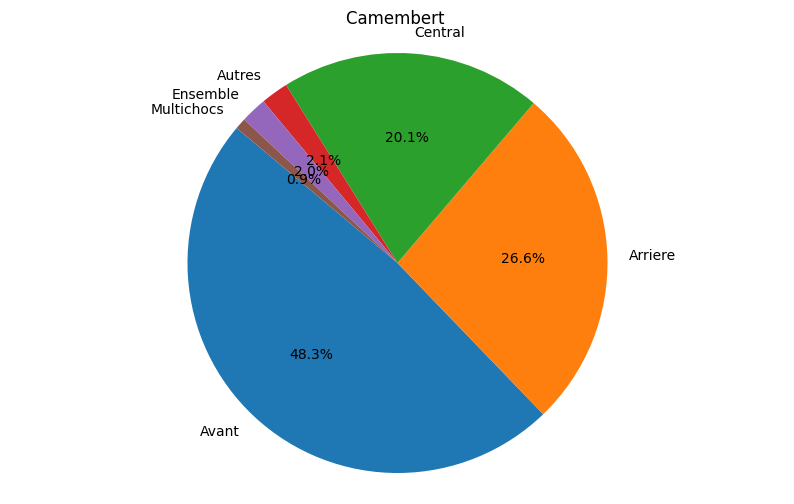

In [20]:
counts= datac['LIB_CHOC'].value_counts(dropna=False)
labels = counts.index.astype(str)
sizes = counts.values
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Camembert ')
plt.axis('equal')  # Pour que le camembert soit un cercle
plt.show()

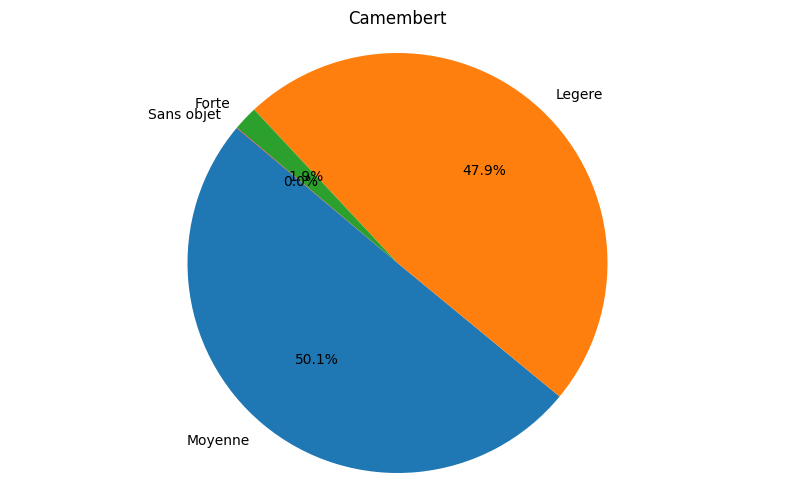

In [203]:
counts= datac['LIB_INTENS'].value_counts(dropna=False)
labels = counts.index.astype(str)
sizes = counts.values
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Camembert')
plt.axis('equal')  # Pour que le camembert soit un cercle
plt.show()

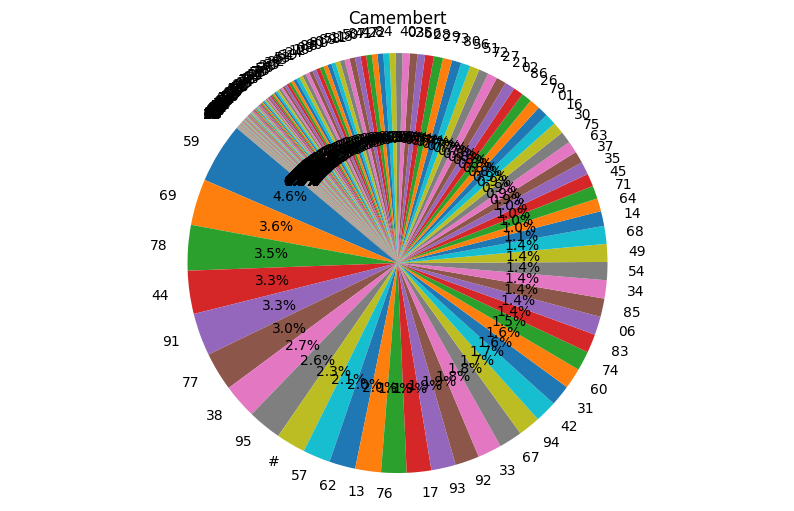

In [204]:
counts= datac['DPT_REP'].value_counts(dropna=False)
labels = counts.index.astype(str)
sizes = counts.values
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Camembert')
plt.axis('equal')  # Pour que le camembert soit un cercle
plt.show()

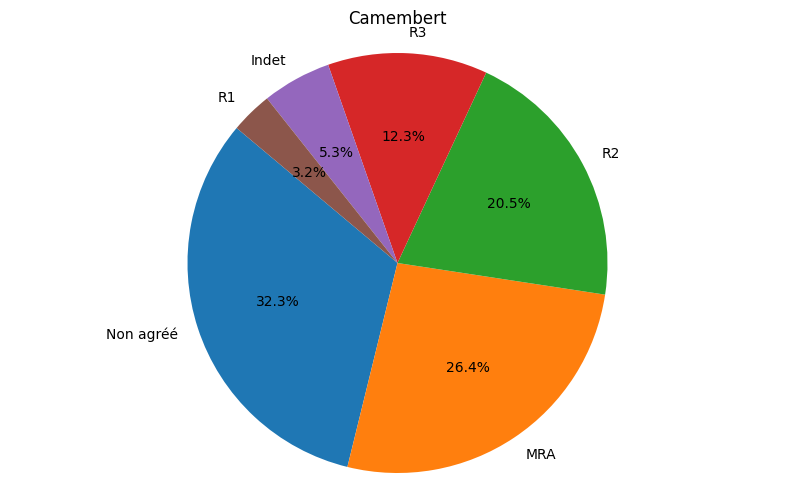

In [205]:
counts= datac['_RESEAU_'].value_counts(dropna=False)
labels = counts.index.astype(str)
sizes = counts.values
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Camembert')
plt.axis('equal')  # Pour que le camembert soit un cercle
plt.show()

In [21]:

# Affichage des valeurs uniques pour chaque variable
variables = ['profess', 'garag', 'marq', 'modele2']

for var in variables:
    if var in datac.columns:
        print(f"\nModalités de {var}:")
        print(datac[var].unique())
    else:
        print(f"\nLa variable {var} n'est pas présente dans le DataFrame.")



Modalités de profess:
['09' 'XB' '03' '04' 'X7' '00' '01' '05' 'X2' '80' '02' 'X1' '50' 'X3'
 '99' '08' '90' '06' '10' 'X9' 'X6' 'XA' '07' '30' 'I' '20' '40' '83' '95'
 'X5' '70' 'XC' '60' '71' 'X8' '93' '0F' '0G']

Modalités de garag:
[16154 44188 44098 ... '46151' '63391' '33149']

Modalités de marq:
['REN' 'FOR' 'AUD' 'PEU' 'CIT' 'NIS' 'FIA' 'VWA' 'HON' 'MER' 'TOY' 'OPE'
 'BMW' 'MIN' 'SUZ' 'DAC' 'CHE' 'LAR' 'VVO' 'MAZ' 'DS' 'HYU' 'LAN' 'KIA'
 'SKO' 'ALF' 'SEA' 'CHR' 'MIT' 'INF' 'JEE' 'POR' 'LXU' 'SUB' 'SMA' 'JAG'
 'QUA' 'ROV' 'SAA' 'SSA' 'DOD' 'ISU' 'DAH' 'FOU' 'MAS' 'AUS' 'MCC' 'LAD'
 'CAD' 'TES' 'DAN' 'SEC' 'DAE' 'AST' 'PGO' 'PON' 'BEN' 'RAN' 'FER' 'MG'
 'TRD' 'VDC' 'ALP' 'LOT' 'HUM' 'VPB' 'CAT' 'SAN' 'MOR' 'TAT' 'SOQ' 'POS'
 'BLU' 'MPM' 'CUP' 'CAU' 'API' 'VAU' 'GMC' 'AIW' 'LIN' 'RET' 'DFS' 'ALN'
 'GME' 'ALV' 'FIS' 'LAM' 'MAH' 'TLT' 'CCO' 'LKO' 'IVE' 'LEA' 'MIA' 'STU'
 'DR' 'BYD' 'ABH']

Modalités de modele2:
['CAPTUR' 'FIESTA' 'A7' 'SCENIC' '3008' 'C3' 'A6' 'NEMO' 'XTRAIL' '500'

In [22]:
 # Liste des variables à supprimer
vars_exclure = ['sans_suite','num_sra', 'modeledesc','elt_secu','bureau_ratt', 'formule_gar']

# Filtrer quant_vars en supprimant les variables à exclure
qualvars = list(set(qual_vars) - set(vars_exclure))


In [23]:
qualvars

['LIB_CHOC',
 'aac',
 'cdval',
 'marq',
 'boite',
 'systeme',
 'GARANTIE_HOST',
 'profess',
 'sitfam',
 'rachat_francBG',
 'date_permis',
 'modele_desc',
 'luxe',
 'caros',
 'crash',
 'sport',
 'formule_ratt',
 'energ',
 'usage2',
 'modele2',
 '_RESEAU_',
 'date_nais',
 'pickup',
 'date_sortie_veh',
 'frein',
 'date_permis_f',
 'quart_resp',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 'garag',
 'DPT_REP',
 'fract_paiem_soc',
 'suspe',
 'franch',
 'segment',
 'trans',
 'sexe',
 'clos',
 'petit_rouleur',
 'ZN_NO_RAPPORT_EXPTIS',
 'vu',
 'alim',
 'cond_indet',
 'date_nais_f',
 'prestige',
 'orig_attest',
 'soumis_crm']

In [24]:
# Regroupement de la variable formule_ratt
datac['formule_ratt_g'] = datac['formule_ratt'].apply(lambda x: x if x in ['PRO', 'EXC', 'CFT', 'I', 'Inconnu'] else 'Autres')

# Regroupement de la variable sitfam
datac['sitfam_g'] = datac['sitfam'].replace({
    'U': 'U_P', 'P': 'U_P', 'V': 'V_D', 'D': 'V_D'
}).apply(lambda x: x if x in ['M', 'C', 'U_P', 'V_D', 'I', 'Inconnu'] else x)

# Regroupement de la variable usage2
datac['usage2_g'] = datac['usage2'].apply(lambda x: x if x in ['Q', 'P', 'R'] else 'Autres')

# Vérification des regroupements
print("Modalités regroupées pour formule_ratt :", datac['formule_ratt_g'].unique())
print("Modalités regroupées pour sitfam :", datac['sitfam_g'].unique())
print("Modalités regroupées pour usage2 :", datac['usage2_g'].unique())


Modalités regroupées pour formule_ratt : ['PRO' 'EXC' 'Autres' 'CFT']
Modalités regroupées pour sitfam : ['V_D' 'C' 'M' 'U_P']
Modalités regroupées pour usage2 : ['P' 'Q' 'R' 'Autres']


In [25]:

# Affichage des valeurs uniques pour chaque variable
variables = ['sport', 'DPT_REP']

for var in variables:
    if var in datac.columns:
        print(f"\nModalités de {var}:")
        print(datac[var].unique())
    else:
        print(f"\nLa variable {var} n'est pas présente dans le DataFrame.")


Modalités de sport:
[1 3 2 '1' '2' '3' '.']

Modalités de DPT_REP:
['16' '49' '44' '#' '79' '85' '17' '86' '35' '37' '29' '56' '72' '42' '06'
 '69' '91' '31' '34' '41' '73' '54' '01' '04' '65' '76' '77' '14' '82'
 '53' '59' '94' '24' '74' '78' '26' '46' '81' '45' '27' '50' '18' '13'
 '93' '87' '40' '33' '60' '92' '83' '64' '30' '57' '32' '08' '28' '95'
 '67' '22' '19' '20' '38' '63' '75' '71' '23' '21' '36' '66' '61' '58'
 '11' '10' '02' '47' '12' '25' '62' '03' '89' '05' '09' '51' '68' '84'
 '43' '88' '07' '48' '15' '70' '80' '39' '55' '52' '90' '98' '00' '97'
 '99' 78 3 91 42 59 50 13 33 35 72 38 86 62 1 17 68 47 93 69 44 95 63 76
 73 83 60 54 80 71 6 67 77 49 43 0 21 34 40 57 74 14 53 31 61 89 29 51 22
 27 10 2 66 90 85 45 79 99 26 7 18 36 25 56 64 20 94 16 87 92 84 81 24 8
 28 30 4 37 75 88 65 9 58 19 11 52 46 82 15 32 5 41 39 12 70 48 55 23 98]


In [26]:
(datac['sport']).info()

<class 'pandas.core.series.Series'>
RangeIndex: 977293 entries, 0 to 977292
Series name: sport
Non-Null Count   Dtype 
--------------   ----- 
977293 non-null  object
dtypes: object(1)
memory usage: 7.5+ MB


In [27]:
# Dictionnaire de remplacement
sport_mapping = {'1': 'nn_spt', 1: 'nn_spt', '2': 's_spt', 2: 's_spt', '3': 'spt', 3: 'spt',
                 None: 'Inconnu', '~': 'Inconnu', 'I': 'Inconnu'}

# Application du remplacement
datac['sport'] = datac['sport'].replace(sport_mapping)

#print(data_modifiee)

In [28]:
# Regroupement de la variable origin_attes
datac['orig_attest_g'] = datac['orig_attest'].apply(lambda x: x if x in ['N', 'A', 'I', 'Inconnu'] else 'Autres')

# Regroupement de la variable caros
datac['caros_g'] = datac['caros'].replace({'BR': 'BR_JL', 'JL': 'BR_JL'}).apply(lambda x: x if x in ['B', 'CR', 'MO', 'BR_JL', 'I', 'Inconnu'] else 'Autres')

# Regroupement de la variable segment
datac['segment_g'] = datac['segment'].replace({'B0': 'B0_B1', 'B1': 'B0_B1', 'H1': 'H1_H2', 'H2': 'H1_H2'}).apply(lambda x: x if x in ['B2', 'M1', 'M2', 'B0_B1', 'H1_H2', 'I', 'Inconnu'] else 'Autres')

# Regroupement de la variable energ
datac['energ_g'] = datac['energ'].apply(lambda x: x if x in ['GO', 'ES', 'I', 'Inconnu'] else 'ES')

# Regroupement de la variable frein
datac['frein_g'] = datac['frein'].apply(lambda x: x if x in ['ABS', 'I', 'Inconnu'] else 'PRES')

# Regroupement de la variable ALIM
datac['alim_g'] = datac['alim'].apply(lambda x: x if x in ['T', 'I', 'Inconnu'] else 'Autres')

# Regroupement de la variable SUSPE
datac['suspe_g'] = datac['suspe'].apply(lambda x: x if x in ['4RI', 'I', 'Inconnu'] else 'Autres')

# Regroupement de la variable crash
datac['crash_g'] = datac['crash'].apply(lambda x: x if x in ['t_bon', 'bon', 'I', 'Inconnu'] else 'moins_bons')

# Regroupement de la variable fract_paiem_soc
datac['fract_paiem_soc_g'] = datac['fract_paiem_soc'].replace({'1': 'A', '2': 'S'}).apply(lambda x: x if x in ['M', 'A', 'S', 'I', 'Inconnu'] else x)

# Regroupement de la variable cdval
datac['cdval_g'] = datac['cdval'].replace({
    'V01': 'V01_5', 'V02': 'V01_5', 'V03': 'V01_5', 'V04': 'V01_5', 'V05': 'V01_5',
    'V06': 'V06_7', 'V07': 'V06_7',
    'V08': 'V08_9_10', 'V09': 'V08_9_10', 'V10': 'V08_9_10',
    'V11': 'V11_V15', 'V12': 'V11_V15', 'V13': 'V11_V15', 'V14': 'V11_V15', 'V15': 'V11_V15'
})

# Regroupement des valeurs de V16 à V33 en conservant "I" et "Inconnu"
datac['cdval_g'] = datac['cdval_g'].apply(lambda x: 'V16_33' if x.startswith('V') and x[1:].isdigit() and int(x[1:]) >= 16 else x)

# Vérification des regroupements
for var in ['orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g',
            'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g']:
    print(f"Modalités regroupées pour {var} :", datac[var].unique())


Modalités regroupées pour orig_attest_g : ['N' 'A' 'Autres']
Modalités regroupées pour caros_g : ['CR' 'B' 'Autres' 'MO' 'BR_JL']
Modalités regroupées pour segment_g : ['B2' 'H1_H2' 'M1' 'M2' 'B0_B1']
Modalités regroupées pour energ_g : ['ES' 'GO']
Modalités regroupées pour frein_g : ['ABS' 'PRES']
Modalités regroupées pour alim_g : ['T' 'I' 'Autres']
Modalités regroupées pour suspe_g : ['4RI' 'Autres']
Modalités regroupées pour crash_g : ['t_bon' 'moins_bons' 'bon']
Modalités regroupées pour fract_paiem_soc_g : ['M' 'S' 'A']
Modalités regroupées pour cdval_g : ['V06_7' 'V16_33' 'V08_9_10' 'V11_V15' 'V01_5']


In [29]:
# Exemple de regroupement basé sur la taille/type du véhicule
datac['modele2_g'] = datac['modele2'].replace({
    'CAPTUR': 'SUV', 'FIESTA': 'Citadine', 'A7': 'Berline Premium', 'SCENIC': 'Monospace',
    'I': 'I', 'Inconnu': 'Inconnu'
}).apply(lambda x: x if x in ['SUV', 'Citadine', 'Berline Premium', 'Monospace', 'I', 'Inconnu'] else 'Autres')


In [30]:
datac['profess_g'] = datac['profess'].replace({
    '09': 'Groupe1', 'XB': 'Groupe2', '03': 'Groupe1', '04': 'Groupe3',
    'X7': 'Groupe4', '00': 'Groupe1', 'I': 'I', 'Inconnu': 'Inconnu'
}).apply(lambda x: x if x in ['Groupe1', 'Groupe2', 'Groupe3', 'Groupe4', 'I', 'Inconnu'] else 'Autres')


In [31]:
marques_generalistes = ['REN', 'PEU', 'CIT', 'TOY', 'HYU', 'OPE', 'KIA', 'SKO', 'FIA', 'NIS', 'HON', 'CHE', 'DAC']
marques_premium = ['BMW', 'AUD', 'MER', 'JAG', 'LEX', 'INF', 'VOL']
marques_luxe_sport = ['FER', 'LAM', 'POR', 'MAS', 'AST']
autres_marques = ['TES', 'BYD', 'DR', 'MIA', 'SEC', 'TRD']

datac['marq_g'] = datac['marq'].apply(lambda x: 
    'Généralistes' if x in marques_generalistes else
    'Premium' if x in marques_premium else
    'Luxe/Sport' if x in marques_luxe_sport else
    'Autres'
)

In [32]:
def categorize_garage(value):
    try:
        num_value = int(value)  # Conversion sécurisée
        if num_value < 30000:
            return 'Petit garage'
        elif 30000 <= num_value < 50000:
            return 'Garage moyen'
        elif 50000 <= num_value < 70000:
            return 'Grand garage'
        else:
            return 'Autres'
    except ValueError:  # Si la conversion échoue (ex. '2B033')
        return 'Autres'

datac['garag_g'] = datac['garag'].apply(categorize_garage)

In [33]:
quali_vars

['cle_sin',
 'date_evt',
 'date_evt_decla',
 'clos',
 'sans_suite',
 'quart_resp',
 'date_premsous',
 'date_dernrempl',
 'formule_ratt',
 'cond_indet',
 'date_nais',
 'date_permis',
 'sexe',
 'profess',
 'sitfam',
 'orig_attest',
 'aac',
 'date_sortie_veh',
 'usage2',
 'franch',
 'rachat_francBG',
 'garag',
 'marq',
 'modele2',
 'modele_desc',
 'caros',
 'segment',
 'energ',
 'num_sra',
 'sport',
 'frein',
 'cdval',
 'trans',
 'alim',
 'suspe',
 'boite',
 'crash',
 'elt_secu',
 'vu',
 'pickup',
 'luxe',
 'prestige',
 'soumis_crm',
 'fract_paiem_soc',
 'formule_gar',
 'petit_rouleur',
 'systeme',
 'GARANTIE_HOST',
 'ZN_NO_RAPPORT_EXPTIS',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 'DPT_REP',
 '_RESEAU_',
 'date_nais_f',
 'date_permis_f']

In [34]:
# Dictionnaires de remplacement
franch_mapping = {'P': 'P', 'D': 'P'}
quart_resp_mapping = {'resp_75pc': 'plus_50pc', 'resp_100pc': 'plus_50pc'}

# Application du remplacement
datac['franch'] = datac['franch'].replace(franch_mapping)
datac['quart_resp'] = datac['quart_resp'].replace(quart_resp_mapping)


In [35]:
# Fonction de nettoyage
def nettoyer_departement(dep):
    dep = str(dep).strip()        # Conversion en string et suppression des espaces
    dep = ''.join(filter(str.isdigit, dep))  # Suppression des caractères non numériques
    if dep == '':
        return None
    elif len(dep) == 1:
        return '0' + dep
    elif len(dep) == 2:
        return dep
    elif len(dep) == 3 and dep.startswith('9'):  # ex: 971, 972...
        return dep
    else:
        return None  # ou '00' ou autre selon ton besoin

# Application du nettoyage
datac['DPT_REP'] = datac['DPT_REP'].apply(nettoyer_departement)

# Affichage du résultat
#print(data_modifiee)

In [36]:
import pandas as pd

# Données de regroupement par région
region_mapping = {
    'Nouvelle-Aquitaine': ['16', '17', '79', '86', '33', '24', '40', '47', '64', '87'],
    'Pays de la Loire': ['49', '44', '85', '53', '72'],
    'Bretagne': ['35', '56', '22', '29'],
    'Centre-Val de Loire': ['37', '41', '18', '45', '28', '36'],
    'Île-de-France': ['75', '77', '78', '91', '92', '93', '94', '95'],
    'Grand Est': ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88'],
    'Hauts-de-France': ['02', '59', '60', '62', '80'],
    'Normandie': ['14', '27', '50', '61', '76'],
    'Bourgogne-Franche-Comté': ['21', '25', '39', '58', '70', '71', '89', '90'],
    'Auvergne-Rhône-Alpes': ['03', '07', '15', '26', '38', '42', '43', '63', '69', '73', '74'],
    'Occitanie': ['09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
    'Provence-Alpes-Côte d’Azur': ['04', '05', '06', '13', '83', '84'],
    'Corse': ['20']
}

# Regroupement en zones géographiques
zones_geographiques = {
    'Nord': ['Hauts-de-France', 'Normandie', 'Grand Est'],
    'Sud': ['Occitanie', 'Provence-Alpes-Côte d’Azur', 'Corse'],
    'Est': ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté'],
    'Ouest': ['Bretagne', 'Pays de la Loire', 'Nouvelle-Aquitaine'],
    'Centre': ['Île-de-France', 'Centre-Val de Loire']
}


In [37]:
import pandas as pd

# Normalisation des valeurs en chaînes de caractères
datac['DPT_REP'] = datac['DPT_REP'].astype(str)

# Dictionnaire de correspondance Région
region_dict = {dep: reg for reg, deps in region_mapping.items() for dep in deps}

# Attribution des Régions
datac['Region'] = datac['DPT_REP'].map(region_dict)

# Détection des départements non reconnus
departements_non_mappes = datac[datac['Region'].isna()]['DPT_REP'].unique()
if len(departements_non_mappes) > 0:
    print(f"Attention : Les départements suivants n'ont pas été reconnus : {departements_non_mappes}")

# Dictionnaire de correspondance Zone
zone_dict = {region: zone for zone, regions in zones_geographiques.items() for region in regions}

# Attribution des Zones, et remplissage par "I" si Region non trouvée
datac['Zone'] = datac['Region'].map(zone_dict)
datac['Zone'] = datac['Zone'].fillna('I')  # "I" pour Inconnue

Attention : Les départements suivants n'ont pas été reconnus : ['None' '01' '19' '23' '98' '00' '97' '99']


In [38]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977293 entries, 0 to 977292
Columns: 133 entries, cle_sin to Zone
dtypes: bool(2), float64(53), int64(3), object(75)
memory usage: 978.6+ MB


In [39]:
# Filtrer les lignes où Zone est NaN et afficher seulement les colonnes DPT_REP et Zone
dpts_nan = datac[datac['Zone'].isna()][['DPT_REP', 'Zone']]

# Afficher le résultat
print(dpts_nan)


Empty DataFrame
Columns: [DPT_REP, Zone]
Index: []


In [40]:
pd.set_option('display.max_rows', None)
manquantes_pc = (datac.isnull().sum()/1011401) * 100
print(manquantes_pc[manquantes_pc > 0].sort_values(ascending=False))

Region    3.526
dtype: float64


In [41]:
new_qual_var = ['clos', 'quart_resp','cond_indet', 'sexe','aac','franch','rachat_francBG', 
                'vu', 'boite', 'pickup', 'luxe', 'prestige', 'soumis_crm',
                 'petit_rouleur', 'systeme', 'GARANTIE_HOST','LIB_CHOC',
                 'LIB_INTENS', 'GARAGE_AGREE_O_N','Zone', '_RESEAU_',
                'marq_g', 'modele2_g', 'profess_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g',
                'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g',
                'fract_paiem_soc_g', 'cdval_g', 'formule_ratt_g', 'garag_g']

In [42]:
print(datac.columns.tolist())


['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice', 'GARANTIE_HOST', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_NETTE', 'MT_REGLEMENT_SIN', 'MT_REGLEMENT_COM', 'MT_ABANDON_RECOURS', 'MT_FRAIS_HONO', 'MT_PROVISIONS', 'MT_RECOURS_TOTAL', 'MT_ESTIMATION_RECOURS_RESTANTS', 'MT_AVANCE_RECOURS',

In [43]:
# Dictionnaires de remplacement
RESEAU_mapping = {'R1': 'R_123', 'R2': 'R_123', 'R3': 'R_123'}
LIB_INTENS_mapping = {'Forte': 'Forte', 'Sans objet': 'Forte'}

# Application du remplacement
datac['_RESEAU_'] = datac['_RESEAU_'].replace(RESEAU_mapping)
datac['LIB_INTENS'] = datac['LIB_INTENS'].replace(LIB_INTENS_mapping)


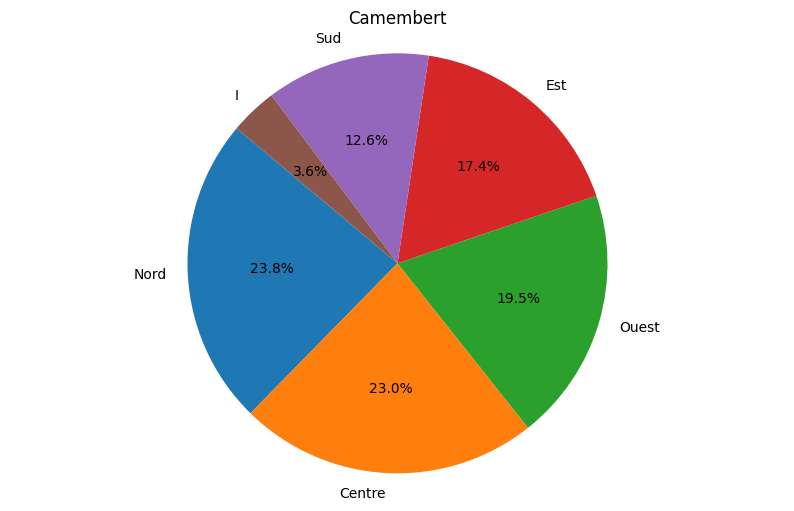

In [44]:
counts= datac['Zone'].value_counts(dropna=False)
labels = counts.index.astype(str)
sizes = counts.values
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Camembert')
plt.axis('equal')  # Pour que le camembert soit un cercle
plt.show()

# Stat desc

In [45]:
import pandas as pd

# ------------------------------------------------------------
# 1. Sélection des variables « importantes »
#    (à adapter selon ton modèle / ton importance métier)
# ------------------------------------------------------------
vars_quanti = [
    "age", "anc_permis", "age_veh",          # assuré / véhicule
    "poidspuiss", "pfisc", "val",    # véhicule
    "MT_MO_REPARABLE", "MT_IP_REPARABLE", "MT_PIECES_REPARABLE"
]

vars_quali = [
    "profess_g", "formule_ratt_g", "quart_resp", "crash_g",
    "segment_g", "marq_g", "usage2_g", "Zone"
]

# ------------------------------------------------------------
# 2. Statistiques rapides quantitatives
#    (count, mean, std, min, 25%, 50%, 75%, max)
# ------------------------------------------------------------
desc_quanti = datac[vars_quanti].describe().T
print("Statistiques descriptives – variables quantitatives :\n", desc_quanti)

# ------------------------------------------------------------
# 3. Statistiques rapides qualitatives
#    – nombre de modalités, modalité la plus fréquente, % manquants
# ------------------------------------------------------------
def quick_cat_stats(df, col):
    counts = df[col].value_counts(dropna=False)
    return {
        "nb_modalités": counts.shape[0],
        "modalité_top": counts.index[0],
        "effectif_top": counts.iloc[0],
        "%_manquants": df[col].isna().mean().round(3),
    }

desc_quali = pd.DataFrame(
    {col: quick_cat_stats(datac, col) for col in vars_quali}
).T
print("\nStatistiques descriptives – variables qualitatives :\n", desc_quali)

Statistiques descriptives – variables quantitatives :
                         count          mean           std     min       25%  \
age                  977293.0     55.737785     17.595563    12.0     42.00   
anc_permis           977293.0     34.152300     17.052987     0.0     20.00   
age_veh              977293.0      6.461781      4.225795     0.0      3.00   
poidspuiss           977293.0     11.744840      2.787337     3.0     10.00   
pfisc                977293.0      6.090324      2.462814     1.0      5.00   
val                  977293.0  27907.226588  12322.326122  1269.0  19261.00   
MT_MO_REPARABLE      977293.0    607.140853    524.417211     0.0    271.80   
MT_IP_REPARABLE      977293.0    190.630385    180.174524     0.0     96.00   
MT_PIECES_REPARABLE  977293.0    790.061033    988.857001     0.0    140.55   

                          50%       75%        max  
age                     57.00     70.00     104.00  
anc_permis              36.00     48.00      87.

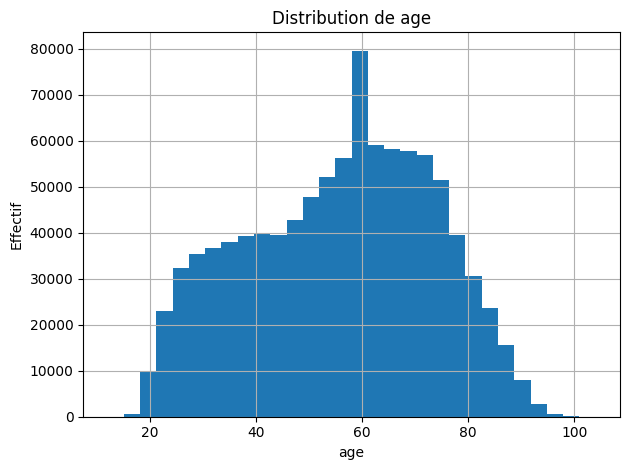

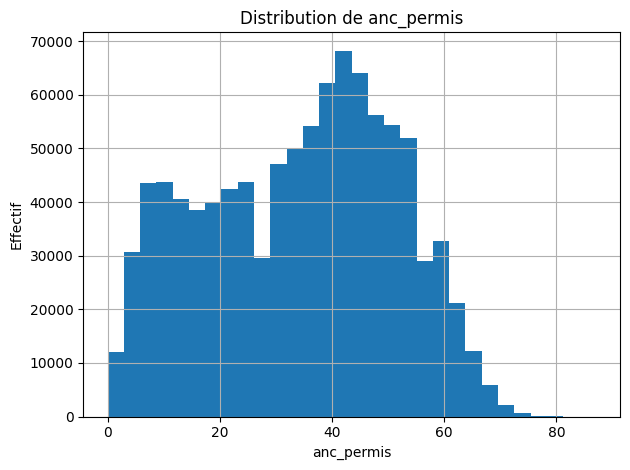

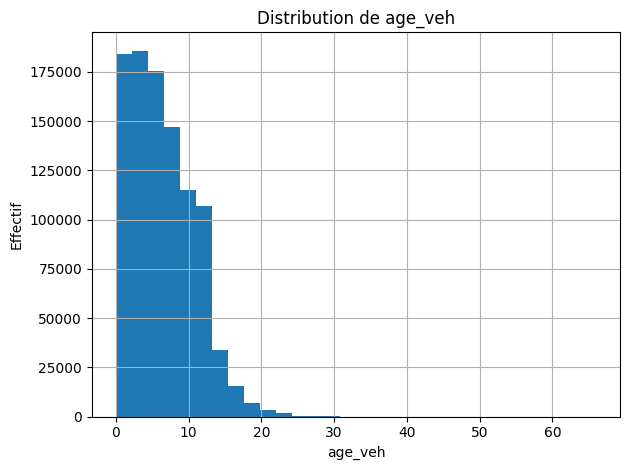

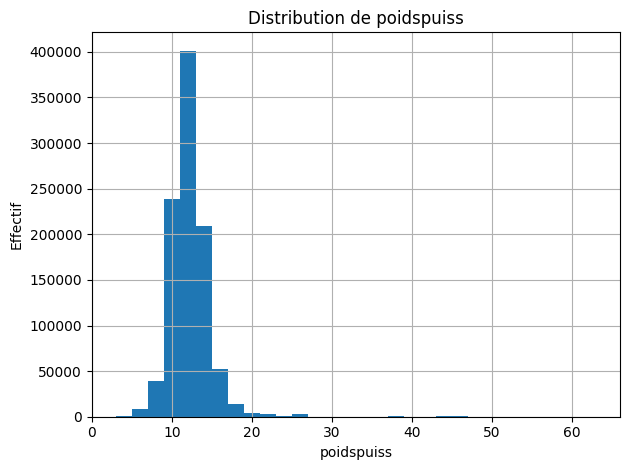

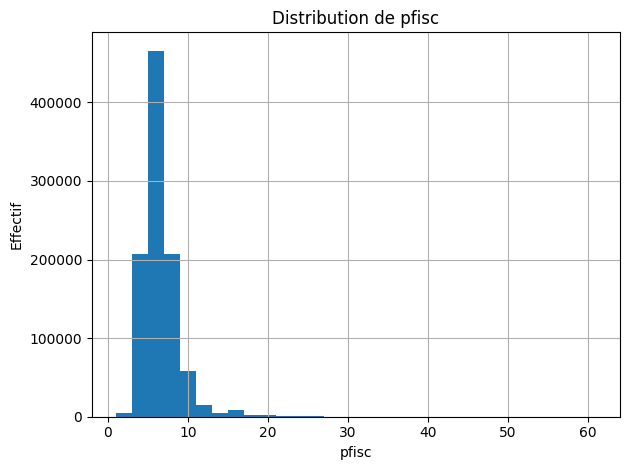

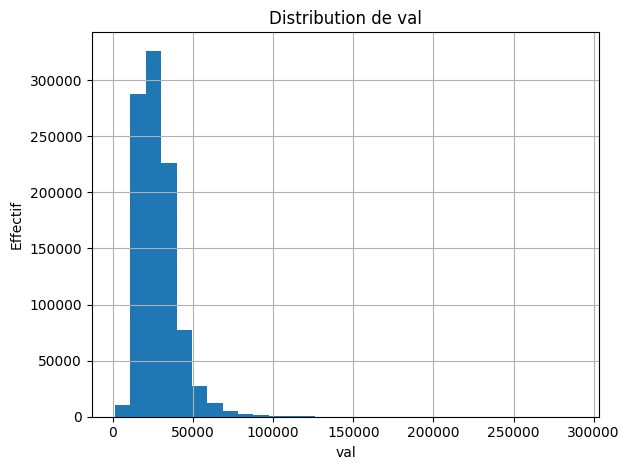

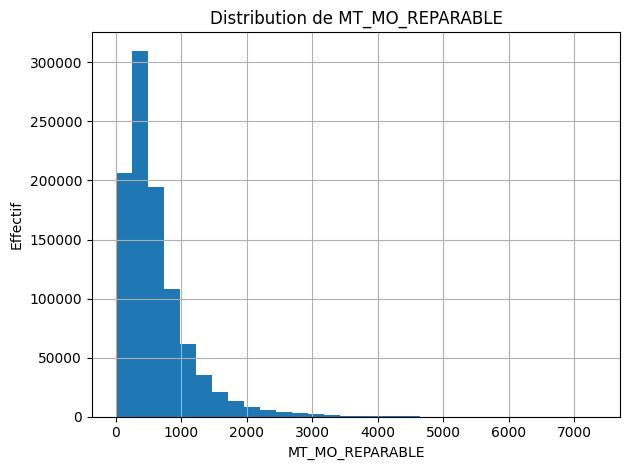

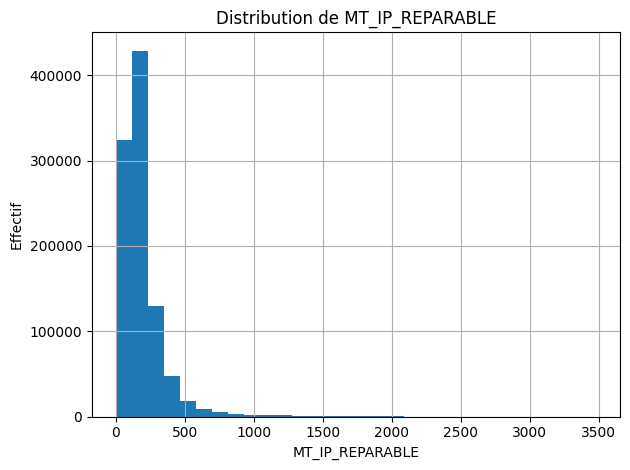

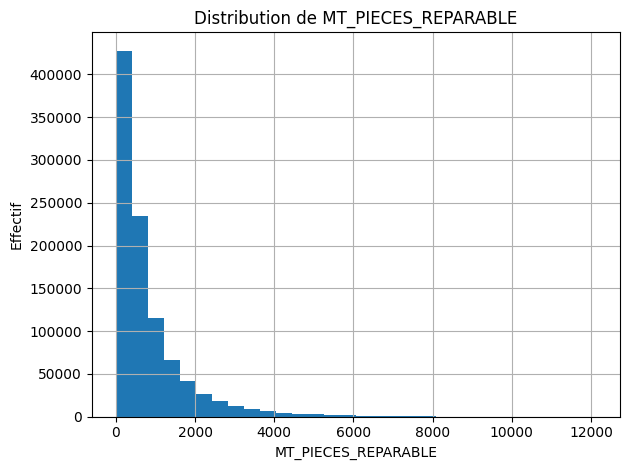

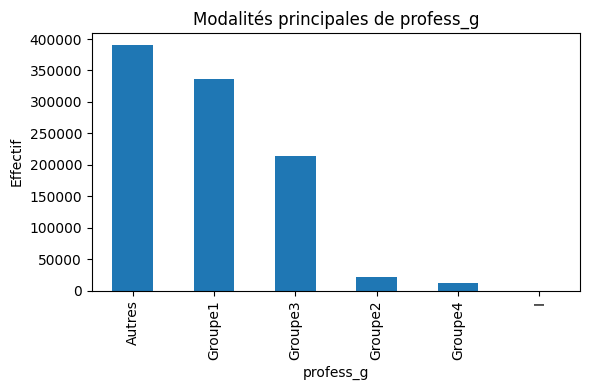

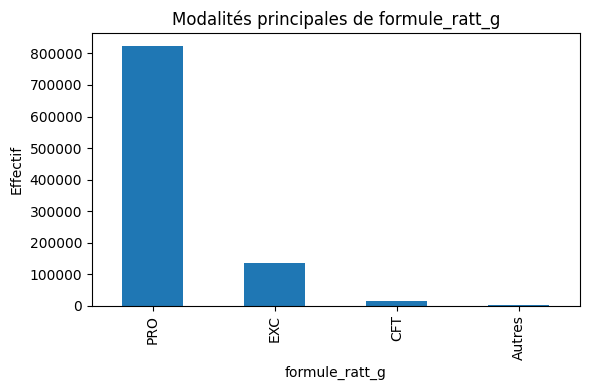

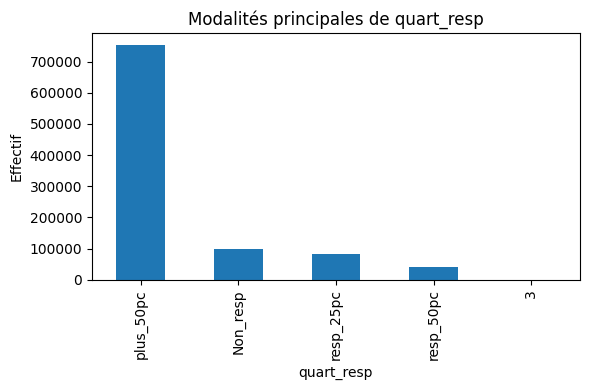

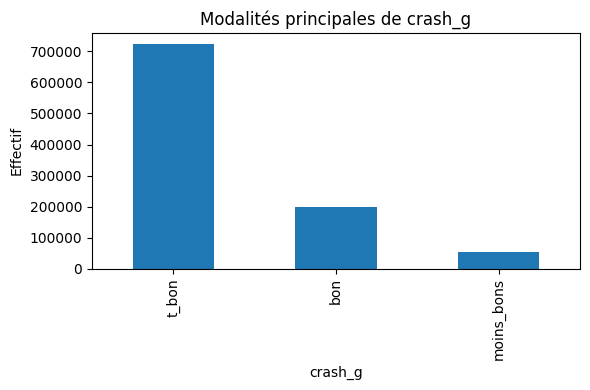

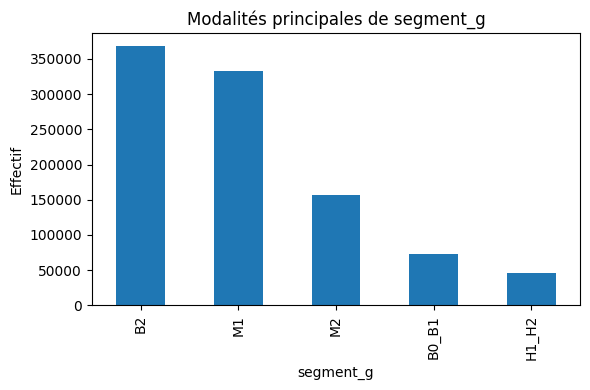

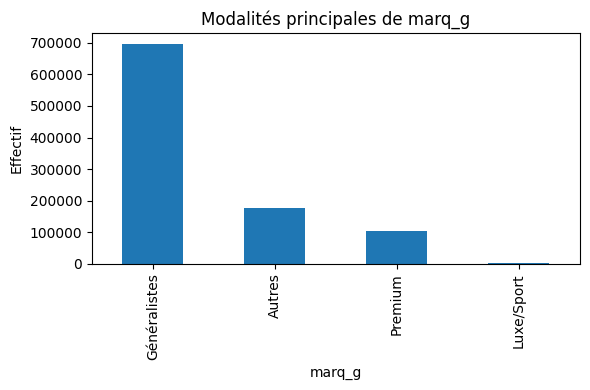

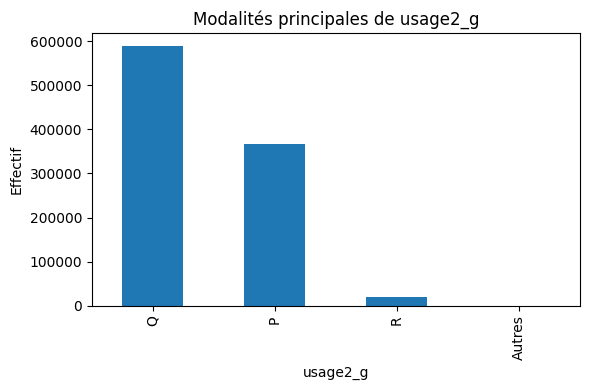

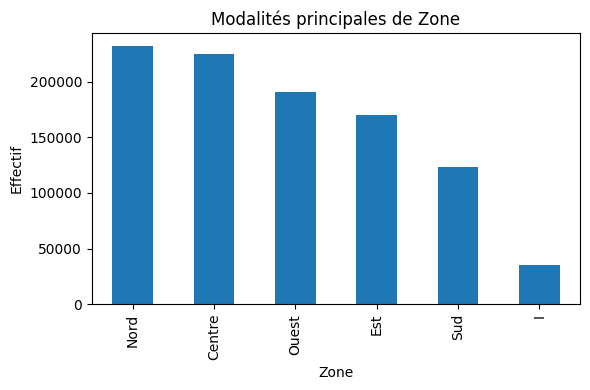

In [47]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Liste des variables (à adapter si besoin)
# ------------------------------------------------------------------
vars_quanti = [
    "age", "anc_permis", "age_veh",
    "poidspuiss", "pfisc", "val",
    "MT_MO_REPARABLE", "MT_IP_REPARABLE", "MT_PIECES_REPARABLE"
]

vars_quali = [
    "profess_g", "formule_ratt_g", "quart_resp", "crash_g",
    "segment_g", "marq_g", "usage2_g", "Zone"
]

# ------------------------------------------------------------------
# 2. Histogrammes pour les quantitatives
# ------------------------------------------------------------------
for col in vars_quanti:
    plt.figure()
    datac[col].dropna().hist(bins=30)          # datac = ton DataFrame
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Effectif")
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 3. Bar-charts pour les qualitatives (top 10 modalités)
# ------------------------------------------------------------------
for col in vars_quali:
    plt.figure(figsize=(6,4))
    datac[col].value_counts(dropna=False).head(10).plot(kind="bar")
    plt.title(f"Modalités principales de {col}")
    plt.xlabel(col)
    plt.ylabel("Effectif")
    plt.tight_layout()
    plt.show()

ENREGISTREMENT DE LA BASE POUR LA MODELISATION DES PROBABILITES

In [48]:
#sauvegarde de la base sous format csv
datac.to_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8", index=False)
# Afficher les premières lignes de la base finale
datac.head()
# Afficher les informations de la base finale
datac.info()
# Afficher les valeurs manquantes dans la base finale
pd.set_option('display.max_rows', None)
manquantes_final = datac.isnull().sum()
print(manquantes_final[manquantes_final > 0].sort_values(ascending=False))
# Afficher le pourcentage de valeurs manquantes dans la base finale
manquantes_final_pc = (datac.isnull().sum()/len(datac)) * 100
print(manquantes_final_pc[manquantes_final_pc > 0].sort_values(ascending=False))
# Afficher les colonnes de la base finale
print(list(datac.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977293 entries, 0 to 977292
Columns: 133 entries, cle_sin to Zone
dtypes: bool(2), float64(53), int64(3), object(75)
memory usage: 978.6+ MB
Region    35662
dtype: int64
Region    3.649059
dtype: float64
['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme',

# II)  Sélection des variables

## A) Vérification de la corrélation avec la variable cible

## 1) Variables qualitatives

In [70]:
import scipy.stats as stats
import pandas as pd

# Liste des variables cibles
variables_cibles = ['MT_TOTAL_REPARABLE', 'MT_MO_REPARABLE', 'MT_IP_REPARABLE', 'MT_PIECES_REPARABLE']

# Initialisation d'un DataFrame pour stocker les p-values
results = []

# Boucler sur chaque variable qualitative
for var_qualitative in new_qual_var:
    if datac[var_qualitative].nunique() < 10:  # Vérification du nombre de modalités
        for var_cible in variables_cibles:
            if var_cible in datac.columns:
                # Création des groupes pour l'ANOVA
                groupes = [datac[datac[var_qualitative] == cat][var_cible] for cat in datac[var_qualitative].unique()]
                
                # Vérifier que chaque groupe a au moins une valeur
                if all(len(groupe) > 1 for groupe in groupes):
                    anova_result = stats.f_oneway(*groupes)
                    
                    # Stocker les résultats
                    results.append({'Variable Cible': var_cible, 'Variable Qualitative': var_qualitative, 'p-value': anova_result.pvalue})
                    
                    # Affichage des résultats
                    print(f"\nANOVA pour {var_cible} en fonction de {var_qualitative}:")
                    print(f"F-statistique : {anova_result.statistic:.3f}, p-value : {anova_result.pvalue:.3f}")
                    
                    if anova_result.pvalue < 0.05:
                        print("→ La variable qualitative semble avoir un impact significatif !")
                    else:
                        print("→ Pas de corrélation statistiquement significative.")
                else:
                    print(f"→ Problème avec la distribution des groupes pour {var_cible}.")
            else:
                print(f"→ La variable cible {var_cible} n'est pas présente dans le DataFrame.")

# Conversion des résultats en DataFrame pour analyse
df_results = pd.DataFrame(results)

# Affichage final des résultats significatifs
print("\n### Résumé des p-values ###")
print(df_results)


ANOVA pour MT_TOTAL_REPARABLE en fonction de clos:
F-statistique : 600.923, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

ANOVA pour MT_MO_REPARABLE en fonction de clos:
F-statistique : 1570.572, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

ANOVA pour MT_IP_REPARABLE en fonction de clos:
F-statistique : 2837.709, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

ANOVA pour MT_PIECES_REPARABLE en fonction de clos:
F-statistique : 39.077, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

ANOVA pour MT_TOTAL_REPARABLE en fonction de quart_resp:
F-statistique : 2631.909, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

ANOVA pour MT_MO_REPARABLE en fonction de quart_resp:
F-statistique : 1421.299, p-value : 0.000
→ La variable qualitative semble avoir un impact significatif !

ANOVA pour MT_IP_REPARABLE en fonction de quart_re

In [71]:
# Création des nouvelles listes en filtrant certaines variables
varqual1 = [var for var in new_qual_var if var not in ['aac', 'soumis_crm', 'suspe_g']]
varqual2 = [var for var in new_qual_var if var not in ['aac', 'soumis_crm']]
varqual3 = [var for var in new_qual_var if var not in ['petit_rouleur']]

# Affichage des résultats
print("varqual1 :", varqual1)
print("varqual2 :", varqual2)
print("varqual3 :", varqual3)

varqual1 : ['clos', 'quart_resp', 'cond_indet', 'sexe', 'franch', 'rachat_francBG', 'vu', 'boite', 'pickup', 'luxe', 'prestige', 'petit_rouleur', 'systeme', 'GARANTIE_HOST', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'Zone', '_RESEAU_', 'marq_g', 'modele2_g', 'profess_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'formule_ratt_g', 'garag_g']
varqual2 : ['clos', 'quart_resp', 'cond_indet', 'sexe', 'franch', 'rachat_francBG', 'vu', 'boite', 'pickup', 'luxe', 'prestige', 'petit_rouleur', 'systeme', 'GARANTIE_HOST', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'Zone', '_RESEAU_', 'marq_g', 'modele2_g', 'profess_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'formule_ratt_g', 'garag_g']
varqual3 : ['clos', 'quart_resp', 'cond_indet', 'sexe', 'aac', 'franch', 'rachat_francBG', 'vu', 'b

## 2) Variables quantitatives

In [149]:
# 1) Main-d’œuvre réparable
datac['ind_mo_rep'] = (datac['MT_MO_REPARABLE'] > 0).astype(int)

# 2) IP (indemnités / pièces) réparable
datac['ind_ip_rep'] = (datac['MT_IP_REPARABLE'] > 0).astype(int)

# 3) Pièces réparables
datac['ind_pieces_rep'] = (datac['MT_PIECES_REPARABLE'] > 0).astype(int)

In [150]:
quant_vars

['age',
 'anc_permis',
 'age_veh',
 'generation',
 'cylin',
 'pdyne',
 'pkw',
 'pfisc',
 'vites',
 'pvid',
 'poidspuiss',
 'val',
 'couple',
 'airbag',
 'co2min',
 'crm',
 'boncond',
 'nab50',
 'bureau_ratt',
 'MT_FRANCHISE',
 'MT_CHARGE_BRUTE',
 'MT_CHARGE_NETTE',
 'MT_REGLEMENT_SIN',
 'MT_REGLEMENT_COM',
 'MT_ABANDON_RECOURS',
 'MT_FRAIS_HONO',
 'MT_PROVISIONS',
 'MT_RECOURS_TOTAL',
 'MT_ESTIMATION_RECOURS_RESTANTS',
 'MT_AVANCE_RECOURS',
 'MT_AVANCE_RECOURS_RECOURUS',
 'MT_PAIEMENTS',
 'MT_CHARGE_BRUTE_ECO',
 'MT_CHARGE_NETTE_ECO',
 'ANNEE_RAPPORT',
 'MT_VAL_REMPL_VEH_TTC',
 'MT_TOTAL_REPARABLE',
 'NB_REP',
 'MT_MO_REPARABLE',
 'NBHH_MO_REPARABLE',
 'TAUX_HORAIRE_MO',
 'MT_IP_REPARABLE',
 'NBHH_IP_REPARABLE',
 'MT_PIECES_REPARABLE',
 'NB_PIECES_REEMPLOI',
 'MT_PIECES_REEMPLOI',
 'RE_AVEC_PIECE_REEMPLOI',
 'RE_AVEC_PIECE_REPAR_MP',
 'RE_AVEC_PIECE_REMPL_MP',
 'MT_REMISE',
 'MT_FORFAIT',
 'MT_FORFAIT_ERD',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE',
 'annee_sortie_veh',
 'ind_mo_rep',

In [152]:
quant_vars

['age',
 'anc_permis',
 'age_veh',
 'generation',
 'cylin',
 'pdyne',
 'pkw',
 'pfisc',
 'vites',
 'pvid',
 'poidspuiss',
 'val',
 'couple',
 'airbag',
 'co2min',
 'crm',
 'boncond',
 'nab50',
 'bureau_ratt',
 'MT_FRANCHISE',
 'MT_CHARGE_BRUTE',
 'MT_CHARGE_NETTE',
 'MT_REGLEMENT_SIN',
 'MT_REGLEMENT_COM',
 'MT_ABANDON_RECOURS',
 'MT_FRAIS_HONO',
 'MT_PROVISIONS',
 'MT_RECOURS_TOTAL',
 'MT_ESTIMATION_RECOURS_RESTANTS',
 'MT_AVANCE_RECOURS',
 'MT_AVANCE_RECOURS_RECOURUS',
 'MT_PAIEMENTS',
 'MT_CHARGE_BRUTE_ECO',
 'MT_CHARGE_NETTE_ECO',
 'ANNEE_RAPPORT',
 'MT_VAL_REMPL_VEH_TTC',
 'MT_TOTAL_REPARABLE',
 'NB_REP',
 'MT_MO_REPARABLE',
 'NBHH_MO_REPARABLE',
 'TAUX_HORAIRE_MO',
 'MT_IP_REPARABLE',
 'NBHH_IP_REPARABLE',
 'MT_PIECES_REPARABLE',
 'NB_PIECES_REEMPLOI',
 'MT_PIECES_REEMPLOI',
 'RE_AVEC_PIECE_REEMPLOI',
 'RE_AVEC_PIECE_REPAR_MP',
 'RE_AVEC_PIECE_REMPL_MP',
 'MT_REMISE',
 'MT_FORFAIT',
 'MT_FORFAIT_ERD',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE',
 'annee_sortie_veh',
 'ind_mo_rep',

In [153]:
quant_vars.remove("ANNEE_RAPPORT")


In [154]:
import pandas as pd

# Créer un DataFrame avec les colonnes quantitatives
df_quant = datac[quant_vars]  

# Vérifier que les variables cibles sont présentes
variables_cibles = ['MT_TOTAL_REPARABLE', 'MT_MO_REPARABLE', 'MT_IP_REPARABLE', 'MT_PIECES_REPARABLE']
variables_presentes = [var for var in variables_cibles if var in df_quant.columns]

# Calculer la corrélation
corr_matrix = df_quant.corr()

# Afficher les coefficients de corrélation
for var in variables_presentes:
    print(f"\nCoefficients de corrélation avec {var}:")
    print(corr_matrix[var].drop(var).sort_values(ascending=False))  # Trier par ordre décroissant

# Afficher les variables cibles absentes
variables_absentes = set(variables_cibles) - set(variables_presentes)
if variables_absentes:
    print(f"\nLes variables suivantes ne sont pas présentes dans le DataFrame : {', '.join(variables_absentes)}")



Coefficients de corrélation avec MT_TOTAL_REPARABLE:
MT_PAIEMENTS                      0.937880
MT_REGLEMENT_SIN                  0.937308
MT_CHARGE_BRUTE_ECO               0.934609
MT_CHARGE_BRUTE                   0.934605
MT_CHARGE_NETTE_ECO               0.914806
MT_CHARGE_NETTE                   0.905199
MT_PIECES_REPARABLE               0.855700
MT_MO_REPARABLE                   0.753769
NBHH_MO_REPARABLE                 0.706174
NB_PIECE_REMPLACEE                0.682157
MT_IP_REPARABLE                   0.560235
NBHH_IP_REPARABLE                 0.535970
MT_REMISE                         0.433404
NB_PIECE_REPAREE                  0.364477
MT_FORFAIT                        0.350640
MT_FRAIS_HONO                     0.279889
RE_AVEC_PIECE_REMPL_MP            0.256174
MT_FRANCHISE                      0.213004
TAUX_HORAIRE_MO                   0.200979
ind_pieces_rep                    0.169645
val                               0.149826
pkw                               0.130799


In [155]:
# Liste des variables à supprimer
variables_a_exclure1 = ['MT_TOTAL_REPARABLE','MT_PIECES_REPARABLE', 'MT_IP_REPARABLE','MT_MO_REPARABLE','MT_AVANCE_RECOURS_RECOURUS', 'MT_AVANCE_RECOURS', 'MT_VAL_REMPL_VEH_TTC', 'co2min']

# Filtrer quant_vars en supprimant les variables à exclure
var_modele1 = [var for var in quant_vars if var not in variables_a_exclure1]

# Affichage du résultat
print("Variables restantes dans var_modele1 :", var_modele1)

# Liste des variables à supprimer
variables_a_exclure2 = ['MT_TOTAL_REPARABLE','MT_PIECES_REPARABLE', 'MT_IP_REPARABLE','MT_MO_REPARABLE','MT_AVANCE_RECOURS_RECOURUS', 'RE_AVEC_PIECE_REMPL_MP', 'MT_VAL_REMPL_VEH_TTC', 'co2min']

# Filtrer quant_vars en supprimant les variables à exclure
var_modele2 = [var for var in quant_vars if var not in variables_a_exclure2]

# Affichage du résultat
print("Variables restantes dans var_modele2 :", var_modele2)


# Liste des variables à supprimer
variables_a_exclure3 = ['MT_TOTAL_REPARABLE','MT_PIECES_REPARABLE', 'MT_IP_REPARABLE','MT_MO_REPARABLE','MT_AVANCE_RECOURS_RECOURUS', 'MT_AVANCE_RECOURS', 'MT_VAL_REMPL_VEH_TTC', 'co2min', 'generation']

# Filtrer quant_vars en supprimant les variables à exclure
var_modele3 = [var for var in quant_vars if var not in variables_a_exclure3]

# Affichage du résultat
print("Variables restantes dans var_modele3 :", var_modele3)

Variables restantes dans var_modele1 : ['age', 'anc_permis', 'age_veh', 'generation', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'val', 'couple', 'airbag', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_NETTE', 'MT_REGLEMENT_SIN', 'MT_REGLEMENT_COM', 'MT_ABANDON_RECOURS', 'MT_FRAIS_HONO', 'MT_PROVISIONS', 'MT_RECOURS_TOTAL', 'MT_ESTIMATION_RECOURS_RESTANTS', 'MT_PAIEMENTS', 'MT_CHARGE_BRUTE_ECO', 'MT_CHARGE_NETTE_ECO', 'NB_REP', 'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE', 'NB_PIECES_REEMPLOI', 'MT_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP', 'RE_AVEC_PIECE_REMPL_MP', 'MT_REMISE', 'MT_FORFAIT', 'MT_FORFAIT_ERD', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'ind_mo_rep', 'ind_ip_rep', 'ind_pieces_rep']
Variables restantes dans var_modele2 : ['age', 'anc_permis', 'age_veh', 'generation', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'val', 'couple', 

## B) Vérification des corrélations entre les différentes variables choisies

## 1)  Variables quantitatives

### Modele 1

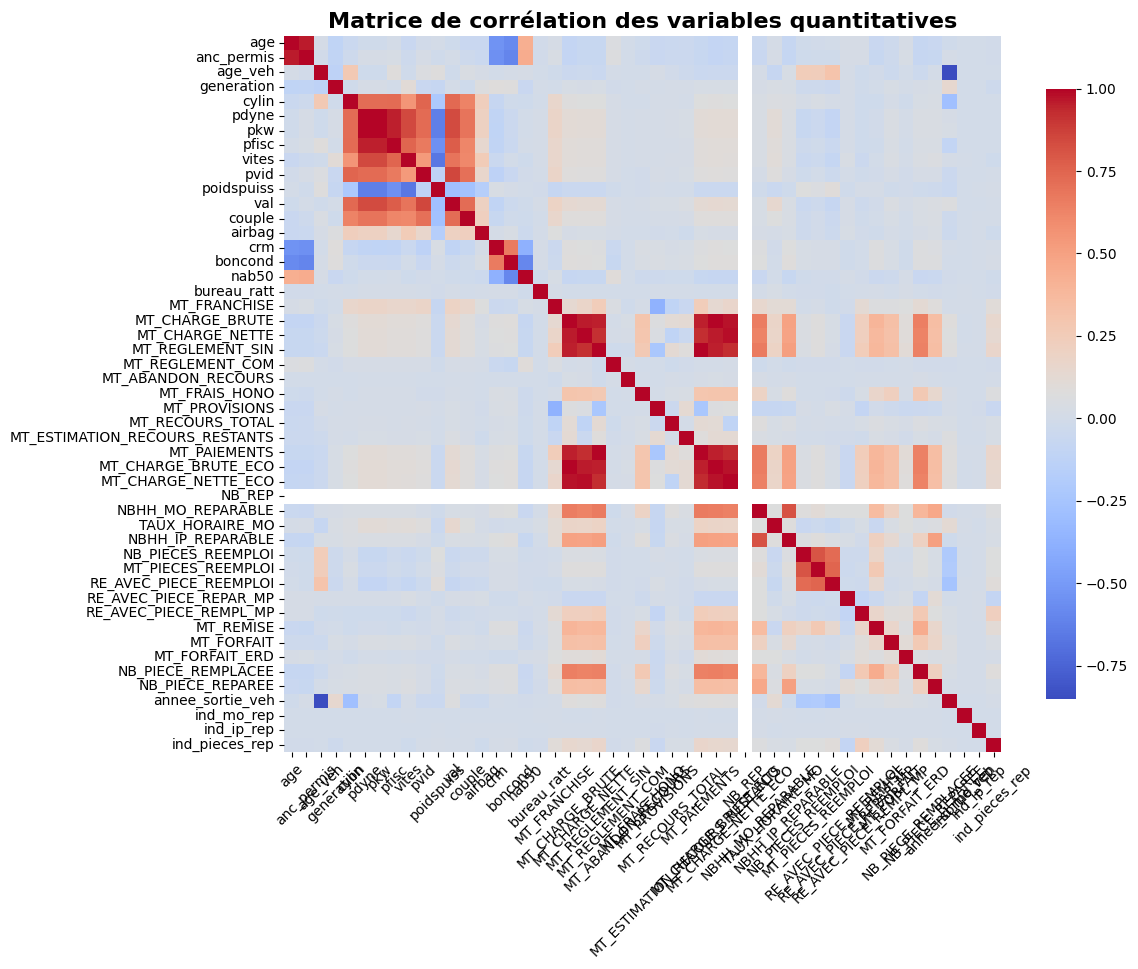

In [157]:
corr_matrix = datac[var_modele1].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation des variables quantitatives', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [158]:
# Calculer la matrice de corrélation
corr_matrix = datac[var_modele1].corr()

# Sélectionner les paires de variables avec |corr| >= 0.5
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Supprimer les auto-corrélations (corrélation d'une variable avec elle-même)
corr_pairs = corr_pairs[corr_pairs < 1]

# Filtrer les valeurs supérieures ou égales à 0.5
strong_corr_pairs = corr_pairs[corr_pairs >= 0.5]

# Affichage des résultats
print(strong_corr_pairs)

MT_CHARGE_BRUTE         MT_CHARGE_BRUTE_ECO       0.999996
MT_CHARGE_BRUTE_ECO     MT_CHARGE_BRUTE           0.999996
pdyne                   pkw                       0.999968
pkw                     pdyne                     0.999968
MT_REGLEMENT_SIN        MT_PAIEMENTS              0.998626
MT_PAIEMENTS            MT_REGLEMENT_SIN          0.998626
MT_CHARGE_NETTE         MT_CHARGE_NETTE_ECO       0.984128
MT_CHARGE_NETTE_ECO     MT_CHARGE_NETTE           0.984128
                        MT_CHARGE_BRUTE_ECO       0.975004
MT_CHARGE_BRUTE_ECO     MT_CHARGE_NETTE_ECO       0.975004
MT_CHARGE_NETTE_ECO     MT_CHARGE_BRUTE           0.975000
MT_CHARGE_BRUTE         MT_CHARGE_NETTE_ECO       0.975000
                        MT_CHARGE_NETTE           0.959288
MT_CHARGE_NETTE         MT_CHARGE_BRUTE           0.959288
                        MT_CHARGE_BRUTE_ECO       0.959283
MT_CHARGE_BRUTE_ECO     MT_CHARGE_NETTE           0.959283
anc_permis              age                       0.9569

In [159]:
var_modele1

['age',
 'anc_permis',
 'age_veh',
 'generation',
 'cylin',
 'pdyne',
 'pkw',
 'pfisc',
 'vites',
 'pvid',
 'poidspuiss',
 'val',
 'couple',
 'airbag',
 'crm',
 'boncond',
 'nab50',
 'bureau_ratt',
 'MT_FRANCHISE',
 'MT_CHARGE_BRUTE',
 'MT_CHARGE_NETTE',
 'MT_REGLEMENT_SIN',
 'MT_REGLEMENT_COM',
 'MT_ABANDON_RECOURS',
 'MT_FRAIS_HONO',
 'MT_PROVISIONS',
 'MT_RECOURS_TOTAL',
 'MT_ESTIMATION_RECOURS_RESTANTS',
 'MT_PAIEMENTS',
 'MT_CHARGE_BRUTE_ECO',
 'MT_CHARGE_NETTE_ECO',
 'NB_REP',
 'NBHH_MO_REPARABLE',
 'TAUX_HORAIRE_MO',
 'NBHH_IP_REPARABLE',
 'NB_PIECES_REEMPLOI',
 'MT_PIECES_REEMPLOI',
 'RE_AVEC_PIECE_REEMPLOI',
 'RE_AVEC_PIECE_REPAR_MP',
 'RE_AVEC_PIECE_REMPL_MP',
 'MT_REMISE',
 'MT_FORFAIT',
 'MT_FORFAIT_ERD',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE',
 'annee_sortie_veh',
 'ind_mo_rep',
 'ind_ip_rep',
 'ind_pieces_rep']

## Modele 2

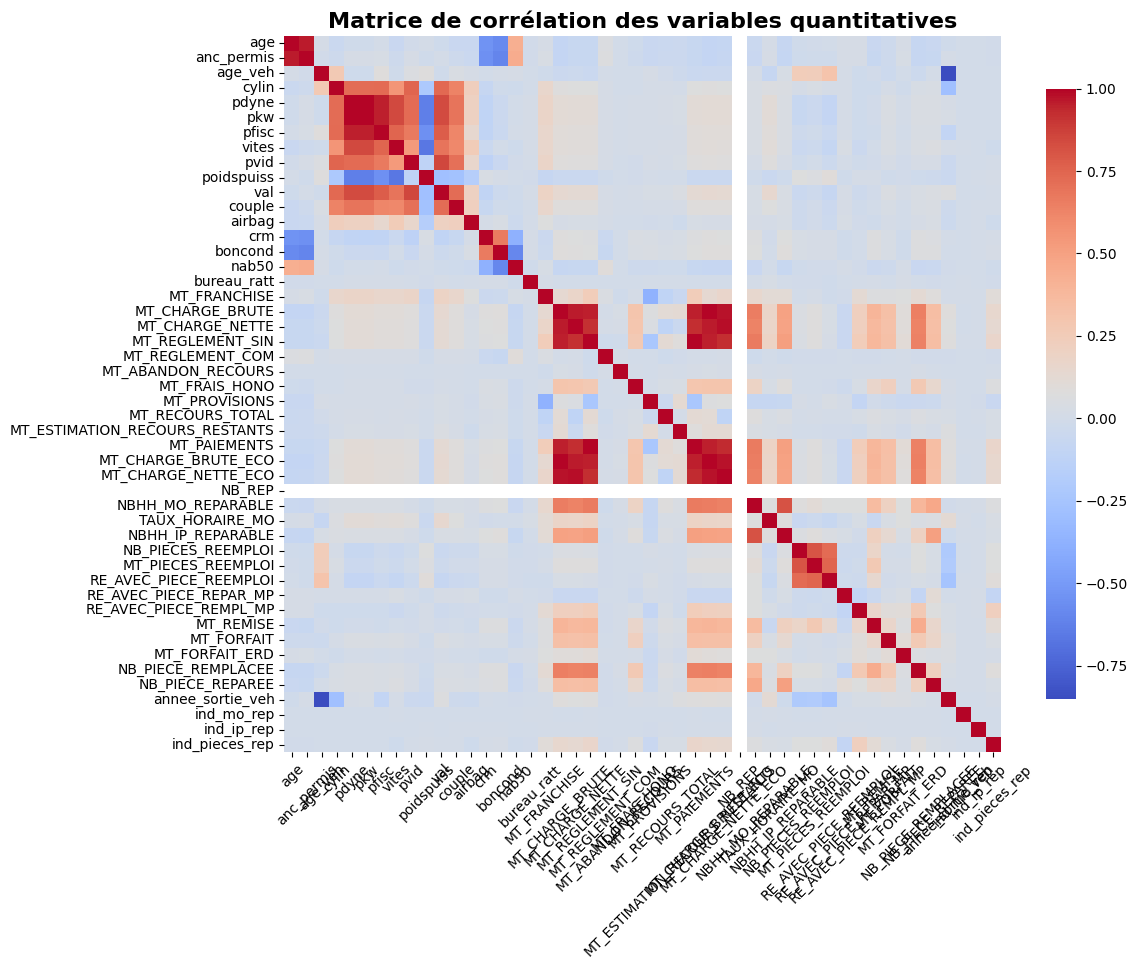

In [161]:
corr_matrix = datac[var_modele3].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation des variables quantitatives', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [162]:
# Calculer la matrice de corrélation
corr_matrix = datac[var_modele2].corr()

# Sélectionner les paires de variables avec |corr| >= 0.5
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Supprimer les auto-corrélations (corrélation d'une variable avec elle-même)
corr_pairs = corr_pairs[corr_pairs < 1]

# Filtrer les valeurs supérieures ou égales à 0.5
strong_corr_pairs = corr_pairs[corr_pairs >= 0.5]

# Affichage des résultats
print(strong_corr_pairs)

MT_CHARGE_BRUTE         MT_CHARGE_BRUTE_ECO       0.999996
MT_CHARGE_BRUTE_ECO     MT_CHARGE_BRUTE           0.999996
pkw                     pdyne                     0.999968
pdyne                   pkw                       0.999968
MT_REGLEMENT_SIN        MT_PAIEMENTS              0.998626
MT_PAIEMENTS            MT_REGLEMENT_SIN          0.998626
MT_CHARGE_NETTE_ECO     MT_CHARGE_NETTE           0.984128
MT_CHARGE_NETTE         MT_CHARGE_NETTE_ECO       0.984128
MT_CHARGE_NETTE_ECO     MT_CHARGE_BRUTE_ECO       0.975004
MT_CHARGE_BRUTE_ECO     MT_CHARGE_NETTE_ECO       0.975004
MT_CHARGE_BRUTE         MT_CHARGE_NETTE_ECO       0.975000
MT_CHARGE_NETTE_ECO     MT_CHARGE_BRUTE           0.975000
MT_CHARGE_BRUTE         MT_CHARGE_NETTE           0.959288
MT_CHARGE_NETTE         MT_CHARGE_BRUTE           0.959288
                        MT_CHARGE_BRUTE_ECO       0.959283
MT_CHARGE_BRUTE_ECO     MT_CHARGE_NETTE           0.959283
anc_permis              age                       0.9569

## Modele3

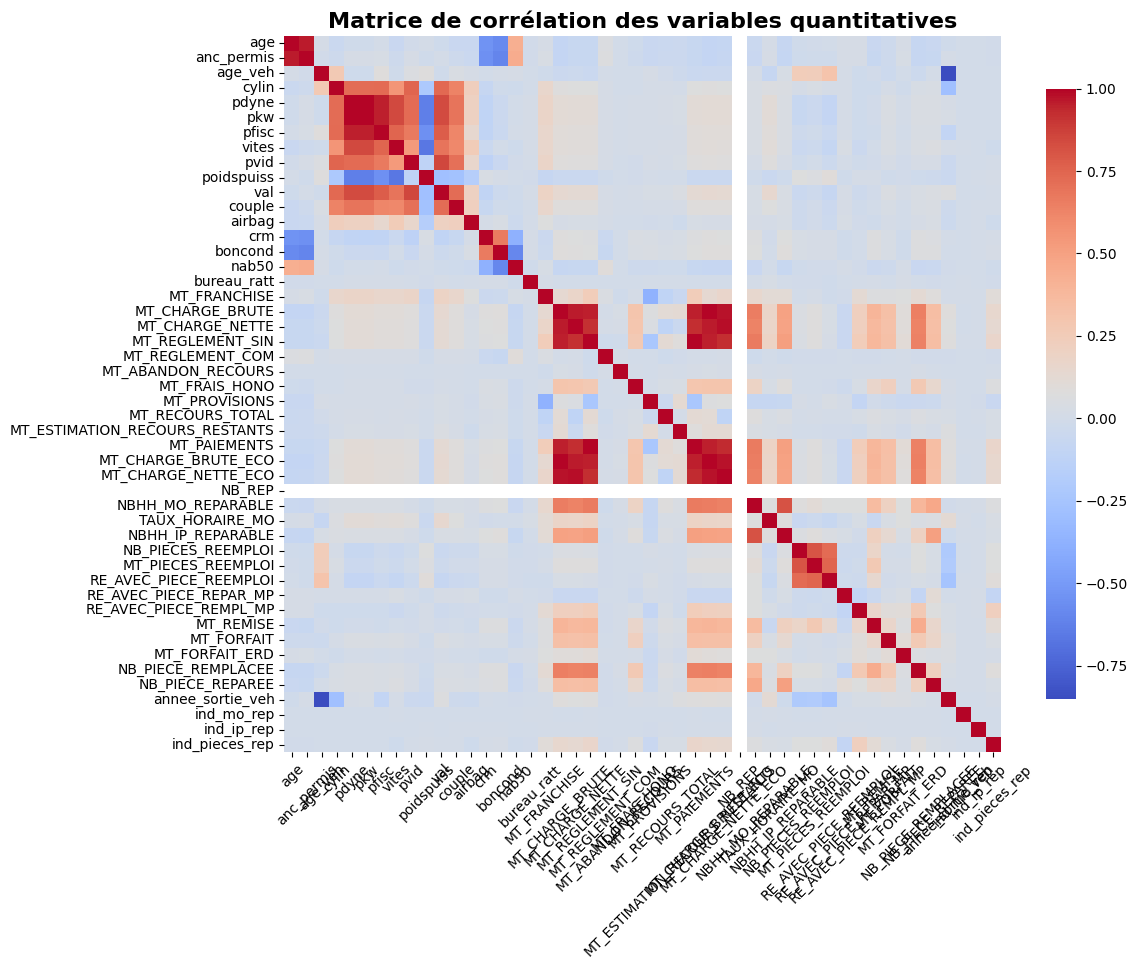

In [164]:
corr_matrix = datac[var_modele3].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation des variables quantitatives', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [166]:
# Calculer la matrice de corrélation
corr_matrix = datac[var_modele3].corr()

# Sélectionner les paires de variables avec |corr| >= 0.5
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Supprimer les auto-corrélations (corrélation d'une variable avec elle-même)
corr_pairs = corr_pairs[corr_pairs < 1]

# Filtrer les valeurs supérieures ou égales à 0.5
strong_corr_pairs = corr_pairs[corr_pairs >= 0.5]

# Affichage des résultats
print(strong_corr_pairs)

MT_CHARGE_BRUTE         MT_CHARGE_BRUTE_ECO       0.999996
MT_CHARGE_BRUTE_ECO     MT_CHARGE_BRUTE           0.999996
pkw                     pdyne                     0.999968
pdyne                   pkw                       0.999968
MT_PAIEMENTS            MT_REGLEMENT_SIN          0.998626
MT_REGLEMENT_SIN        MT_PAIEMENTS              0.998626
MT_CHARGE_NETTE         MT_CHARGE_NETTE_ECO       0.984128
MT_CHARGE_NETTE_ECO     MT_CHARGE_NETTE           0.984128
                        MT_CHARGE_BRUTE_ECO       0.975004
MT_CHARGE_BRUTE_ECO     MT_CHARGE_NETTE_ECO       0.975004
MT_CHARGE_NETTE_ECO     MT_CHARGE_BRUTE           0.975000
MT_CHARGE_BRUTE         MT_CHARGE_NETTE_ECO       0.975000
MT_CHARGE_NETTE         MT_CHARGE_BRUTE           0.959288
MT_CHARGE_BRUTE         MT_CHARGE_NETTE           0.959288
MT_CHARGE_BRUTE_ECO     MT_CHARGE_NETTE           0.959283
MT_CHARGE_NETTE         MT_CHARGE_BRUTE_ECO       0.959283
anc_permis              age                       0.9569

## 2) Variables qualitatives

In [167]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction optimisée pour calculer Cramér V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

## Modele1

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\2677703732.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26343435531466547' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\2677703732.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.021727865299437536' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\2677703732.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0228116197451056

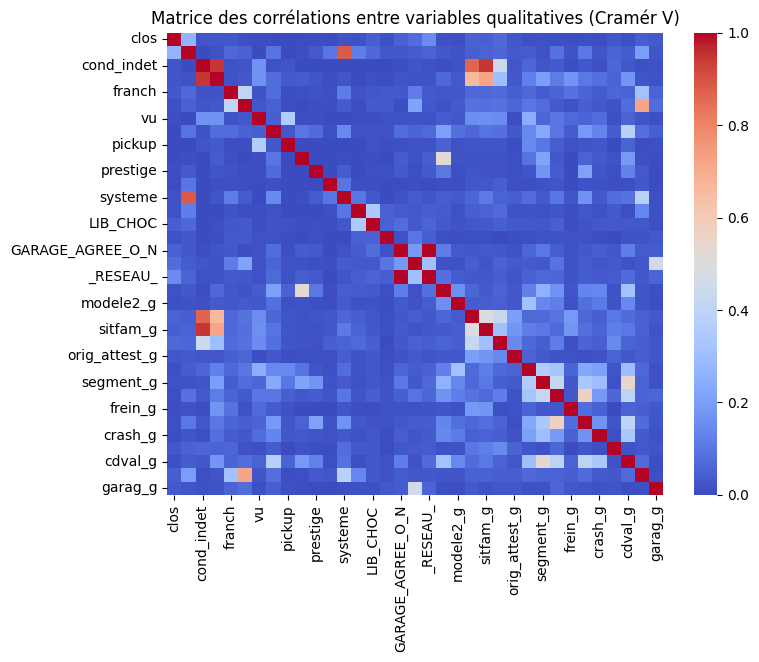

In [172]:
# Réduire le nombre de catégories uniques
for var in varqual1:
    top_categories = datac[var].value_counts().index[:50]  # Garder les 50 catégories les plus fréquentes
    datac[var] = datac[var].apply(lambda x: x if x in top_categories else "Autre")

# Calculer la matrice de corrélation Cramér V avec optimisation mémoire
cramer_matrix = pd.DataFrame(index=varqual1, columns=varqual1, dtype=np.float32)

for var1 in varqual1:
    for var2 in varqual1:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])

# Affichage du heatmap des corrélations qualitatives
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_matrix, annot=False, cmap="coolwarm", vmin=0, vmax=1)

plt.title("Matrice des corrélations entre variables qualitatives (Cramér V)")
plt.show()

In [173]:
# Code pour filtrer les corrélations fortes (≥ 0.4)
import pandas as pd
import numpy as np
import scipy.stats as ss

# Fonction pour calculer le coefficient de Cramér V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)  # Table de contingence
    chi2 = ss.chi2_contingency(contingency_table)[0]  # Calcul du Chi²
    n = contingency_table.sum().sum()  # Nombre total d'observations
    k = min(contingency_table.shape)  # Taille minimale de la table
    return np.sqrt(chi2 / (n * (k - 1)))  # Formule de Cramér V


# Calculer la matrice de corrélation Cramér V
cramer_matrix = pd.DataFrame(index=varqual1, columns=varqual1, dtype=np.float32)

for var1 in varqual1:
    for var2 in varqual1:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1  # Corrélation parfaite avec soi-même
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])

# Convertir en float pour l'affichage
cramer_matrix = cramer_matrix.astype(float)

# 🔍 Extraire les paires avec Cramér V ≥ 0.4
corr_pairs = cramer_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Supprimer les auto-corrélations
strong_corr_pairs = corr_pairs[corr_pairs >= 0.4]  # Filtrer les valeurs fortes

# Affichage des résultats
print("🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :")
print(strong_corr_pairs)


C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\2113045611.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26343435531466547' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\2113045611.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.021727865299437536' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\2113045611.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0228116197451056

🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :
sitfam_g        cond_indet        0.946169
sexe            cond_indet        0.946169
cond_indet      sexe              0.946169
                sitfam_g          0.946169
quart_resp      systeme           0.883927
systeme         quart_resp        0.883927
profess_g       cond_indet        0.865410
cond_indet      profess_g         0.865410
formule_ratt_g  rachat_francBG    0.720873
rachat_francBG  formule_ratt_g    0.720873
sitfam_g        sexe              0.718961
sexe            sitfam_g          0.718961
profess_g       sexe              0.657753
sexe            profess_g         0.657753
energ_g         alim_g            0.576811
alim_g          energ_g           0.576811
cdval_g         segment_g         0.546631
segment_g       cdval_g           0.546631
luxe            marq_g            0.526506
marq_g          luxe              0.526506
sitfam_g        profess_g         0.489673
profess_g       sitfam_g          0.4896

In [174]:
varqual1

['clos',
 'quart_resp',
 'cond_indet',
 'sexe',
 'franch',
 'rachat_francBG',
 'vu',
 'boite',
 'pickup',
 'luxe',
 'prestige',
 'petit_rouleur',
 'systeme',
 'GARANTIE_HOST',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 'Zone',
 '_RESEAU_',
 'marq_g',
 'modele2_g',
 'profess_g',
 'sitfam_g',
 'usage2_g',
 'orig_attest_g',
 'caros_g',
 'segment_g',
 'energ_g',
 'frein_g',
 'alim_g',
 'crash_g',
 'fract_paiem_soc_g',
 'cdval_g',
 'formule_ratt_g',
 'garag_g']

## Modele2

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\4084422001.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26343435531466547' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\4084422001.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.021727865299437536' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\4084422001.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0228116197451056

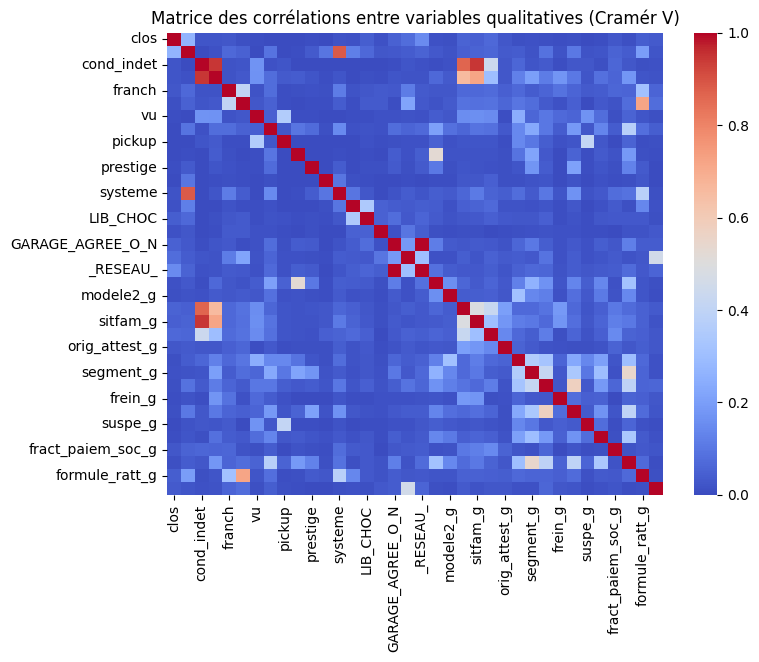

In [177]:
# Réduire le nombre de catégories uniques
for var in varqual2:
    top_categories = datac[var].value_counts().index[:50]  # Garder les 50 catégories les plus fréquentes
    datac[var] = datac[var].apply(lambda x: x if x in top_categories else "Autre")

# Calculer la matrice de corrélation Cramér V avec optimisation mémoire
cramer_matrix = pd.DataFrame(index=varqual2, columns=varqual2, dtype=np.float32)

for var1 in varqual2:
    for var2 in varqual2:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])

# Affichage du heatmap des corrélations qualitatives
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_matrix, annot=False, cmap="coolwarm", vmin=0, vmax=1)

plt.title("Matrice des corrélations entre variables qualitatives (Cramér V)")
plt.show()

In [178]:
# Code pour filtrer les corrélations fortes (≥ 0.4)
import pandas as pd
import numpy as np
import scipy.stats as ss

# Fonction pour calculer le coefficient de Cramér V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)  # Table de contingence
    chi2 = ss.chi2_contingency(contingency_table)[0]  # Calcul du Chi²
    n = contingency_table.sum().sum()  # Nombre total d'observations
    k = min(contingency_table.shape)  # Taille minimale de la table
    return np.sqrt(chi2 / (n * (k - 1)))  # Formule de Cramér V


# Calculer la matrice de corrélation Cramér V
cramer_matrix = pd.DataFrame(index=varqual1, columns=varqual1, dtype=np.float32)

for var1 in varqual2:
    for var2 in varqual2:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1  # Corrélation parfaite avec soi-même
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])

# Convertir en float pour l'affichage
cramer_matrix = cramer_matrix.astype(float)

# 🔍 Extraire les paires avec Cramér V ≥ 0.4
corr_pairs = cramer_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Supprimer les auto-corrélations
strong_corr_pairs = corr_pairs[corr_pairs >= 0.4]  # Filtrer les valeurs fortes

# Affichage des résultats
print("🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :")
print(strong_corr_pairs)

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\808810863.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26343435531466547' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\808810863.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.021727865299437536' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\808810863.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.022811619745105614'

🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :
cond_indet      sitfam_g          0.946169
                sexe              0.946169
sitfam_g        cond_indet        0.946169
sexe            cond_indet        0.946169
quart_resp      systeme           0.883927
systeme         quart_resp        0.883927
cond_indet      profess_g         0.865410
profess_g       cond_indet        0.865410
formule_ratt_g  rachat_francBG    0.720873
rachat_francBG  formule_ratt_g    0.720873
sexe            sitfam_g          0.718961
sitfam_g        sexe              0.718961
profess_g       sexe              0.657753
sexe            profess_g         0.657753
energ_g         alim_g            0.576811
alim_g          energ_g           0.576811
cdval_g         segment_g         0.546631
segment_g       cdval_g           0.546631
luxe            marq_g            0.526506
marq_g          luxe              0.526506
profess_g       sitfam_g          0.489673
sitfam_g        profess_g         0.4896

## Modele3

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\3162268269.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26343435531466547' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\3162268269.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.021727865299437536' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\3162268269.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0228116197451056

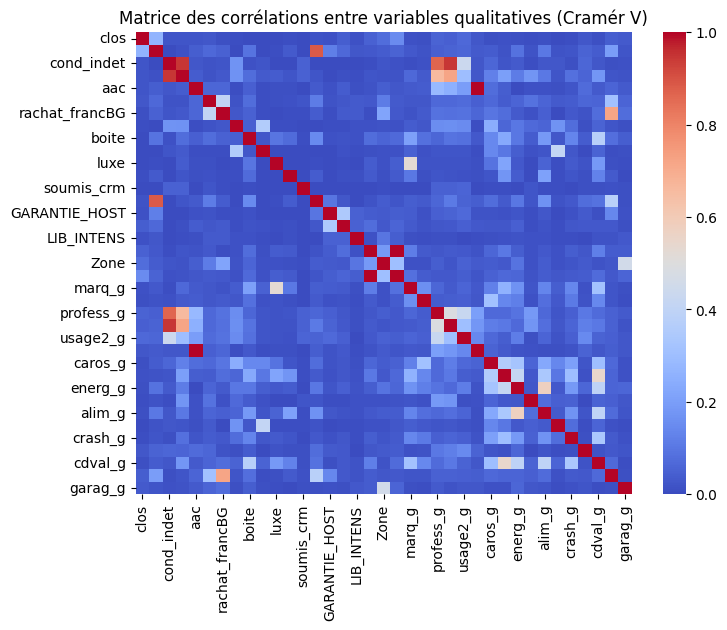

In [179]:
# Réduire le nombre de catégories uniques
for var in varqual3:
    top_categories = datac[var].value_counts().index[:50]  # Garder les 50 catégories les plus fréquentes
    datac[var] = datac[var].apply(lambda x: x if x in top_categories else "Autre")

# Calculer la matrice de corrélation Cramér V avec optimisation mémoire
cramer_matrix = pd.DataFrame(index=varqual3, columns=varqual3, dtype=np.float32)

for var1 in varqual3:
    for var2 in varqual3:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])

# Affichage du heatmap des corrélations qualitatives
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_matrix, annot=False, cmap="coolwarm", vmin=0, vmax=1)

plt.title("Matrice des corrélations entre variables qualitatives (Cramér V)")
plt.show()

In [180]:
# Code pour filtrer les corrélations fortes (≥ 0.4)
import pandas as pd
import numpy as np
import scipy.stats as ss

# Fonction pour calculer le coefficient de Cramér V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)  # Table de contingence
    chi2 = ss.chi2_contingency(contingency_table)[0]  # Calcul du Chi²
    n = contingency_table.sum().sum()  # Nombre total d'observations
    k = min(contingency_table.shape)  # Taille minimale de la table
    return np.sqrt(chi2 / (n * (k - 1)))  # Formule de Cramér V


# Calculer la matrice de corrélation Cramér V
cramer_matrix = pd.DataFrame(index=varqual1, columns=varqual1, dtype=np.float32)

for var1 in varqual3:
    for var2 in varqual3:
        if var1 == var2:
            cramer_matrix.loc[var1, var2] = 1  # Corrélation parfaite avec soi-même
        else:
            cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])

# Convertir en float pour l'affichage
cramer_matrix = cramer_matrix.astype(float)

# 🔍 Extraire les paires avec Cramér V ≥ 0.4
corr_pairs = cramer_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Supprimer les auto-corrélations
strong_corr_pairs = corr_pairs[corr_pairs >= 0.4]  # Filtrer les valeurs fortes

# Affichage des résultats
print("🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :")
print(strong_corr_pairs)

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\1825494147.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.26343435531466547' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\1825494147.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.021727865299437536' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  cramer_matrix.loc[var1, var2] = cramers_v(datac[var1], datac[var2])
C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_21864\1825494147.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0228116197451056

🔹 Paires de variables qualitatives avec Cramér V ≥ 0.4 :
aac             orig_attest_g     0.999639
orig_attest_g   aac               0.999639
sexe            cond_indet        0.946169
sitfam_g        cond_indet        0.946169
cond_indet      sitfam_g          0.946169
                sexe              0.946169
systeme         quart_resp        0.883927
quart_resp      systeme           0.883927
profess_g       cond_indet        0.865410
cond_indet      profess_g         0.865410
formule_ratt_g  rachat_francBG    0.720873
rachat_francBG  formule_ratt_g    0.720873
sitfam_g        sexe              0.718961
sexe            sitfam_g          0.718961
profess_g       sexe              0.657753
sexe            profess_g         0.657753
alim_g          energ_g           0.576811
energ_g         alim_g            0.576811
segment_g       cdval_g           0.546631
cdval_g         segment_g         0.546631
luxe            marq_g            0.526506
marq_g          luxe              0.5265

In [181]:
# ----------------------------------
# 1) Définis les colonnes de coût
#    (adapte la liste si tu as d'autres noms)
# ----------------------------------
cost_cols = ['MT_MO_REPARABLE',
             'MT_IP_REPARABLE',
             'MT_PIECES_REPARABLE']   # ↙ ajoute 'MT_PEINTURE' si elle existe

# ----------------------------------
# 2) Nombre de postes > 0 par ligne
# ----------------------------------
datac['nb_postes_positifs'] = (datac[cost_cols] > 0).sum(axis=1)

# ----------------------------------
# 3) Lignes où plusieurs postes sont actifs
# ----------------------------------
multi_rows = datac[datac['nb_postes_positifs'] > 1]

print(f"{multi_rows.shape[0]} lignes présentent plusieurs postes > 0")

# Aperçu des premières lignes concernées
print(multi_rows[cost_cols + ['nb_postes_positifs']].head())

# ----------------------------------
# 4) (Optionnel) tableau de fréquence
# ----------------------------------
freq_table = datac['nb_postes_positifs'].value_counts().sort_index()
print("\nRépartition du nombre de postes positifs :")
print(freq_table)


1011385 lignes présentent plusieurs postes > 0
   MT_MO_REPARABLE  MT_IP_REPARABLE  MT_PIECES_REPARABLE  nb_postes_positifs
0           225.28            76.24              1373.76                   3
1            40.00           146.30               465.45                   3
2           369.20           171.50               688.35                   3
3           292.25           100.00               296.00                   3
4            28.00           137.50               134.51                   3

Répartition du nombre de postes positifs :
nb_postes_positifs
1        16
2     82366
3    929019
Name: count, dtype: int64


# TU T'ES ARRETE ICI

## Recapitulatif des variables sélectionnnées

In [334]:
selected_columns = [
    'pkw', 'age_veh', 'cylin', 'poidspuiss','generation', 'airbag', 'energ_g',
    'anc_permis', 'crm', 'nab50','cdval_g',
    'Zone', '_RESEAU_', 'usage2_g', 'modele2_g', 'crash_g','boite', 'luxe', 'petit_rouleur',
    'NBHH_MO_REPARABLE',  'TAUX_HORAIRE_MO', 'NB_PIECES_REEMPLOI', 'fract_paiem_soc_g',
    'sexe', 'sitfam_g', 'quart_resp', 'formule_ratt_g', 'franch', 
    'clos', 'vu', 'LIB_CHOC', 'LIB_INTENS',
    'MT_CHARGE_BRUTE', 'MT_REGLEMENT_SIN', 'MT_FRANCHISE',
    'MT_TOTAL_REPARABLE', 'MT_MO_REPARABLE']

# Sélection des colonnes dans le DataFrame
data_MO = data_modifiee[selected_columns]

# III) Enregistrement des 3 bases de sévérité pour les 3 modèles

## 1) Base MO

In [336]:
#sauvegarde de la base sous format csv
data_MO.to_csv(path + "\\base_model_MO.csv", sep=";", encoding="latin1", index=False)
# Afficher les premières lignes de la base finale
data_MO.head()
# Afficher les informations de la base finale
data_MO.info()
# Afficher les valeurs manquantes dans la base finale
pd.set_option('display.max_rows', None)
manquantes_final = data_MO.isnull().sum()
print(manquantes_final[manquantes_final > 0].sort_values(ascending=False))
# Afficher le pourcentage de valeurs manquantes dans la base finale
manquantes_final_pc = (data_MO.isnull().sum()/len(data_MO)) * 100
print(manquantes_final_pc[manquantes_final_pc > 0].sort_values(ascending=False))
# Afficher les colonnes de la base finale
print(list(data_MO.columns))

<class 'pandas.core.frame.DataFrame'>
Index: 1011401 entries, 74107 to 1531806
Data columns (total 37 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   pkw                 1011401 non-null  float64
 1   age_veh             1011401 non-null  float64
 2   cylin               1011401 non-null  float64
 3   poidspuiss          1011401 non-null  float64
 4   generation          1011401 non-null  float64
 5   airbag              1011401 non-null  float64
 6   energ_g             1011401 non-null  object 
 7   anc_permis          1011401 non-null  float64
 8   crm                 1011401 non-null  float64
 9   nab50               1011401 non-null  float64
 10  cdval_g             1011401 non-null  object 
 11  Zone                1011401 non-null  object 
 12  _RESEAU_            1011401 non-null  object 
 13  usage2_g            1011401 non-null  object 
 14  modele2_g           1011401 non-null  object 
 15  crash_g         

## 2) BASE PT

## 3) BASE PIECE

# FIN FIN FIN

A METTRE DS LE FICHIER MODELISATION

In [358]:
train_data_Cout1, validation_data_Cout1 = train_test_split(data_MO, test_size=0.3, random_state=42)

# Show the size of the resulting sets
print("Training set size :", len(train_data_Cout1))
print("Validation set size :", len(validation_data_Cout1))

Training set size : 707980
Validation set size : 303421


In [ ]:
'pkw', 'age_veh', 'cylin', 'poidspuiss','generation', 'airbag', 'energ_g',
    'anc_permis', 'crm', 'nab50','cdval_g',
    'Zone', '_RESEAU_', 'usage2_g', 'modele2_g', 'crash_g','boite', 'luxe', 'petit_rouleur',
    'NBHH_MO_REPARABLE',  'TAUX_HORAIRE_MO', 'NB_PIECES_REEMPLOI', 'fract_paiem_soc_g',
    'sexe', 'sitfam_g', 'quart_resp', 'formule_ratt_g', 'franch', 
    'clos', 'vu', 'LIB_CHOC', 'LIB_INTENS',

In [ ]:
model1 = smf.glm('MT_MO_REPARABLE ~ pkw + age_veh + cylin + poidspuiss + generation + airbag + energ_g  + anc_permis + crm + nab50 + cdval_g + Zone +  _RESEAU_ + usage2_g + modele2_g + crash_g + boite + luxe + petit_rouleur + NBHH_MO_REPARABLE + TAUX_HORAIRE_MO + NB_PIECES_REEMPLOI + fract_paiem_soc_g + sexe + sitfam_g + quart_resp + formule_ratt_g + franch + clos + vu + LIB_CHOC + LIB_INTENS', data=train_data_Cout1, family=sm.families.Gamma(link=sm.families.links.inverse_power()))

#family=sm.families.Gamma(link=sm.families.links.log()))
result1 = model1.fit()
print(result1.summary())


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Note_book\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Note_book\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Note_book\.venv\Lib\site-packages\statsmodels\genmod\families\family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_sta

                 Generalized Linear Model Regression Results                  
Dep. Variable:        MT_MO_REPARABLE   No. Observations:               809120
Model:                            GLM   Df Residuals:                   809055
Model Family:                   Gamma   Df Model:                           64
Link Function:          inverse_power   Scale:                         0.44719
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Wed, 18 Jun 2025   Deviance:                   4.7959e+05
Time:                        13:45:49   Pearson chi2:                 3.62e+05
No. Iterations:                    29   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [345]:
# Modèle : Gaussienne (normale) avec lien identité
model_gauss1 = smf.glm('MT_MO_REPARABLE ~ pkw + age_veh + cylin + poidspuiss + generation + airbag + energ_g  + anc_permis + crm + nab50 + cdval_g + Zone +  _RESEAU_ + usage2_g + modele2_g + crash_g + boite + luxe + petit_rouleur + NBHH_MO_REPARABLE + TAUX_HORAIRE_MO + NB_PIECES_REEMPLOI + fract_paiem_soc_g + sexe + sitfam_g + quart_resp + formule_ratt_g + franch + clos + vu + LIB_CHOC + LIB_INTENS', data=train_data_Cout1,
                      family=sm.families.Gaussian(link=sm.families.links.identity())).fit()

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Note_book\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [346]:
print(model_gauss1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        MT_MO_REPARABLE   No. Observations:               809120
Model:                            GLM   Df Residuals:                   809055
Model Family:                Gaussian   Df Model:                           64
Link Function:               identity   Scale:                          26600.
Method:                          IRLS   Log-Likelihood:            -5.2700e+06
Date:                Wed, 18 Jun 2025   Deviance:                   2.1521e+10
Time:                        15:17:07   Pearson chi2:                 2.15e+10
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [359]:
# Modèle  : Inverse-Gaussienne avec lien canonique (1/μ²)
model_invgauss1 = smf.glm('MT_MO_REPARABLE ~ pkw + age_veh + cylin + poidspuiss + generation + airbag + energ_g  + anc_permis + crm + nab50 + cdval_g + Zone +  _RESEAU_ + usage2_g + modele2_g + crash_g + boite + luxe + petit_rouleur + NBHH_MO_REPARABLE + TAUX_HORAIRE_MO + NB_PIECES_REEMPLOI + fract_paiem_soc_g + sexe + sitfam_g + quart_resp + formule_ratt_g + franch + clos + vu + LIB_CHOC + LIB_INTENS', data=train_data_Cout1[train_data_Cout1['MT_MO_REPARABLE'] > 0],
                         family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Note_book\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


MemoryError: 

In [311]:
import numpy as np
import pandas as pd  
import seaborn as sns
#import ydata_profiling
import scipy.stats as sc
import time # pour le temps

import plotly.express as px
import statsmodels.api as sm
from tabulate import tabulate
from scipy.stats import nbinom

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
from scipy.stats import chi2_contingency
from scipy.stats import invgauss, kstest

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.iolib.summary2 import summary_col
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import gamma, invgauss, lognorm, norm, pareto

## GLM

## Modele 1

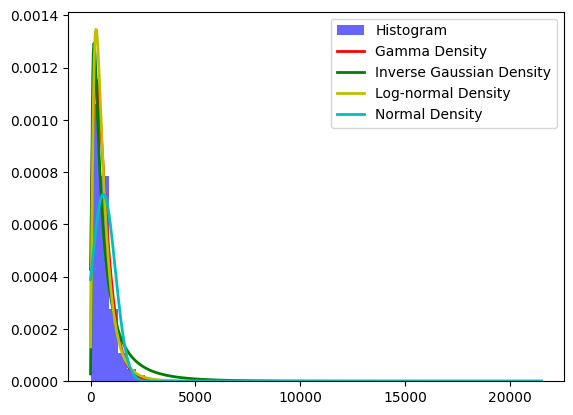

In [321]:
MT_MO_pos = data_modifiee['MT_MO_REPARABLE'][data_modifiee['MT_MO_REPARABLE'] > 0]

# Fit distributions to the data
params_gamma = gamma.fit(MT_MO_pos)
params_invgauss = invgauss.fit(MT_MO_pos)
params_lognorm = lognorm.fit(MT_MO_pos)
params_norm = norm.fit(MT_MO_pos)

# Plot histogram
plt.hist(MT_MO_pos, bins=50, density=True, alpha=0.6, color='b', label='Histogram')

# Plot the fitted density curves
x = np.linspace(0, MT_MO_pos.max(), 1000)
plt.plot(x, gamma.pdf(x, *params_gamma), 'r-', lw=2, label='Gamma Density')
plt.plot(x, invgauss.pdf(x, *params_invgauss), 'g-', lw=2, label='Inverse Gaussian Density')
plt.plot(x, lognorm.pdf(x, *params_lognorm), 'y-', lw=2, label='Log-normal Density')
plt.plot(x, norm.pdf(x, *params_norm), 'c-', lw=2, label='Normal Density')

# Add a legend and display the graph
plt.legend()
plt.show()


Test du chi-deux pour l'adéquation à une loi normale:
Statistic: 423563.6715975049
P-value: 0.0


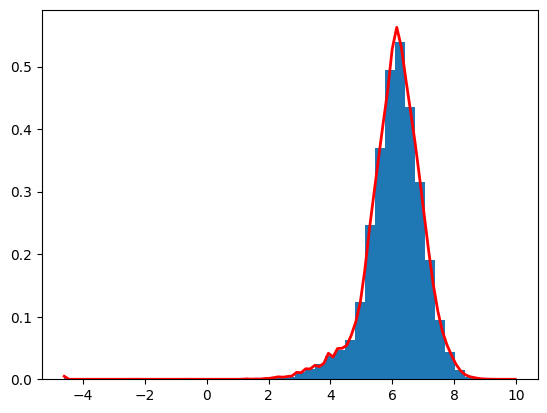

In [ ]:
# Filter out negative or zero values
MT_MO_pos = data_modifiee['MT_MO_REPARABLE'][data_modifiee['MT_MO_REPARABLE'] > 0]

# Calculate the logarithm of the variable
y_log = np.log(MT_MO_pos)

# lot the histogram of the logarithm of the variable
plt.hist(y_log, density=True, bins=45)
plt.plot(np.linspace(y_log.min(), y_log.max(), num=100), 
         sm.nonparametric.KDEUnivariate(y_log).fit().evaluate(np.linspace(y_log.min(), y_log.max(), num=100)), 
         color='red', linewidth=2)

# Test if the variable follows a normal distribution
statistic, p_value = stats.normaltest(y_log)
print("Test du chi-deux pour l'adéquation à une loi normale:")
print("Statistic:", statistic)
print("P-value:", p_value)

plt.show()

La p-value etant < 0.05, on rejette l'hypothèse nulle. Les données ne suivant donc pas la loi normale

In [ ]:
# Filter out negative or zero values
MT_MO_pos = data_modifiee['MT_MO_REPARABLE'][data_modifiee['MT_MO_REPARABLE'] > 0]

# Effectuer le test d'adéquation de Kolmogorov-Smirnov
statistic, p_value = kstest(MT_MO_pos, 'invgauss', invgauss.fit(MT_MO_pos))

# Afficher le résultat du test
print("Test d'adéquation de Kolmogorov-Smirnov pour la loi inverse gaussienne:")
print("Statistic:", statistic)
print("P-value:", p_value)

Test d'adéquation de Kolmogorov-Smirnov pour la loi inverse gaussienne:
Statistic: 0.12687907168627122
P-value: 0.0


La p-value etant < 0.05, on rejette l'hypothèse nulle. Les données ne suivant donc pas la loi inverse gaussienne

In [318]:
from scipy.stats import gamma

# Filter out negative or zero values
MT_MO_pos = data_modifiee['MT_MO_REPARABLE'][data_modifiee['MT_MO_REPARABLE'] > 0]

# Effectuer le test d'adéquation de Kolmogorov-Smirnov pour la loi gamma
statistic_gamma, p_value_gamma = kstest(MT_MO_pos, 'gamma', gamma.fit(MT_MO_pos))

# Afficher le résultat du test pour la loi gamma
print("Test d'adéquation de Kolmogorov-Smirnov pour la loi gamma:")
print("Statistic:", statistic_gamma)
print("P-value:", p_value_gamma)

Test d'adéquation de Kolmogorov-Smirnov pour la loi gamma:
Statistic: 0.0425441131430844
P-value: 0.0


In [319]:
# Filter out negative or zero values
MT_MO_pos = data_modifiee['MT_MO_REPARABLE'][data_modifiee['MT_MO_REPARABLE'] > 0]

# Effectuer le test d'adéquation de Kolmogorov-Smirnov pour la loi log-normale
statistic_lognorm, p_value_lognorm = kstest(MT_MO_pos, 'lognorm', lognorm.fit(MT_MO_pos))

# Afficher le résultat du test pour la loi log-normale
print("Test d'adéquation de Kolmogorov-Smirnov pour la loi log-normale:")
print("Statistic:", statistic_lognorm)
print("P-value:", p_value_lognorm)


Test d'adéquation de Kolmogorov-Smirnov pour la loi log-normale:
Statistic: 0.014164892026231585
P-value: 1.0899093316980022e-176


Ce test pour les trois loi nous montre comme précedement, que la loi Gamma, serait la plus adéquate pour modéliser les coûts de sinistre. C'est elle qu'on utilisera dans le GLM-coût

## Modele 2

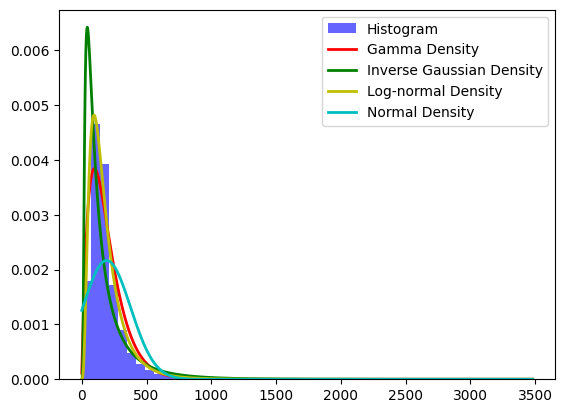

In [313]:
MT_IP_pos = data_modifiee['MT_IP_REPARABLE'][data_modifiee['MT_IP_REPARABLE'] > 0]

# Fit distributions to the data
params_gamma = gamma.fit(MT_IP_pos)
params_invgauss = invgauss.fit(MT_IP_pos)
params_lognorm = lognorm.fit(MT_IP_pos)
params_norm = norm.fit(MT_IP_pos)

# Plot histogram
plt.hist(MT_IP_pos, bins=50, density=True, alpha=0.6, color='b', label='Histogram')

# Plot the fitted density curves
x = np.linspace(0, MT_IP_pos.max(), 1000)
plt.plot(x, gamma.pdf(x, *params_gamma), 'r-', lw=2, label='Gamma Density')
plt.plot(x, invgauss.pdf(x, *params_invgauss), 'g-', lw=2, label='Inverse Gaussian Density')
plt.plot(x, lognorm.pdf(x, *params_lognorm), 'y-', lw=2, label='Log-normal Density')
plt.plot(x, norm.pdf(x, *params_norm), 'c-', lw=2, label='Normal Density')

# Add a legend and display the graph
plt.legend()
plt.show()

Test du chi-deux pour l'adéquation à une loi normale:
Statistic: 35759.85027747847
P-value: 0.0


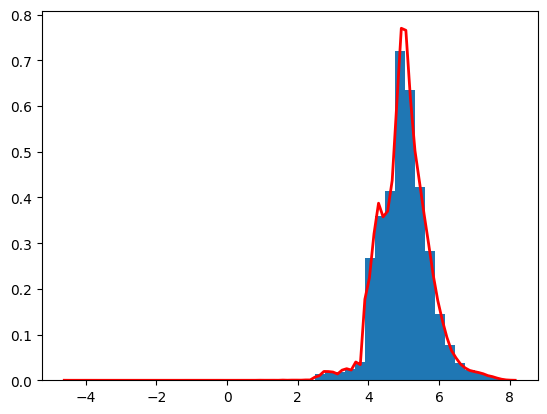

In [322]:
# Filter out negative or zero values
MT_IP_pos = data_modifiee['MT_IP_REPARABLE'][data_modifiee['MT_IP_REPARABLE'] > 0]

# Calculate the logarithm of the variable
y_log = np.log(MT_IP_pos)

# lot the histogram of the logarithm of the variable
plt.hist(y_log, density=True, bins=45)
plt.plot(np.linspace(y_log.min(), y_log.max(), num=100), 
         sm.nonparametric.KDEUnivariate(y_log).fit().evaluate(np.linspace(y_log.min(), y_log.max(), num=100)), 
         color='red', linewidth=2)

# Test if the variable follows a normal distribution
statistic, p_value = stats.normaltest(y_log)
print("Test du chi-deux pour l'adéquation à une loi normale:")
print("Statistic:", statistic)
print("P-value:", p_value)

plt.show()

In [323]:
# Filter out negative or zero values
MT_IP_pos = data_modifiee['MT_IP_REPARABLE'][data_modifiee['MT_IP_REPARABLE'] > 0]

# Effectuer le test d'adéquation de Kolmogorov-Smirnov
statistic, p_value = kstest(MT_IP_pos, 'invgauss', invgauss.fit(MT_IP_pos))

# Afficher le résultat du test
print("Test d'adéquation de Kolmogorov-Smirnov pour la loi inverse gaussienne:")
print("Statistic:", statistic)
print("P-value:", p_value)

Test d'adéquation de Kolmogorov-Smirnov pour la loi inverse gaussienne:
Statistic: 0.20334250159880007
P-value: 0.0


In [324]:
from scipy.stats import gamma

# Filter out negative or zero values
MT_IP_pos = data_modifiee['MT_IP_REPARABLE'][data_modifiee['MT_IP_REPARABLE'] > 0]

# Effectuer le test d'adéquation de Kolmogorov-Smirnov pour la loi gamma
statistic_gamma, p_value_gamma = kstest(MT_IP_pos, 'gamma', gamma.fit(MT_MO_pos))

# Afficher le résultat du test pour la loi gamma
print("Test d'adéquation de Kolmogorov-Smirnov pour la loi gamma:")
print("Statistic:", statistic_gamma)
print("P-value:", p_value_gamma)

Test d'adéquation de Kolmogorov-Smirnov pour la loi gamma:
Statistic: 0.5654599349646245
P-value: 0.0


In [325]:
# Filter out negative or zero values
MT_IP_pos = data_modifiee['MT_IP_REPARABLE'][data_modifiee['MT_IP_REPARABLE'] > 0]

# Effectuer le test d'adéquation de Kolmogorov-Smirnov pour la loi log-normale
statistic_lognorm, p_value_lognorm = kstest(MT_IP_pos, 'lognorm', lognorm.fit(MT_IP_pos))

# Afficher le résultat du test pour la loi log-normale
print("Test d'adéquation de Kolmogorov-Smirnov pour la loi log-normale:")
print("Statistic:", statistic_lognorm)
print("P-value:", p_value_lognorm)

Test d'adéquation de Kolmogorov-Smirnov pour la loi log-normale:
Statistic: 0.04000872092539942
P-value: 0.0


## Modele 3

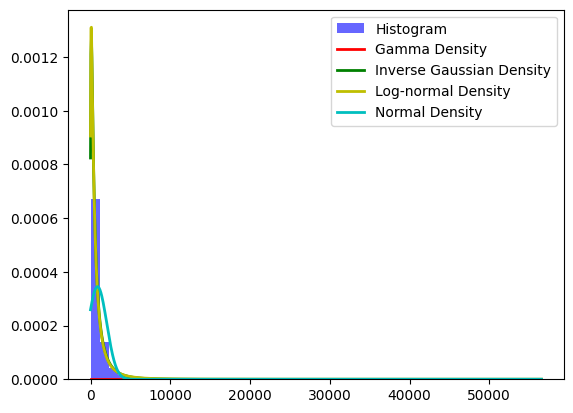

In [314]:
MT_PIECES_pos = data_modifiee['MT_PIECES_REPARABLE'][data_modifiee['MT_PIECES_REPARABLE'] > 0]

# Fit distributions to the data
params_gamma = gamma.fit(MT_PIECES_pos)
params_invgauss = invgauss.fit(MT_PIECES_pos)
params_lognorm = lognorm.fit(MT_PIECES_pos)
params_norm = norm.fit(MT_PIECES_pos)

# Plot histogram
plt.hist(MT_PIECES_pos, bins=50, density=True, alpha=0.6, color='b', label='Histogram')

# Plot the fitted density curves
x = np.linspace(0, MT_PIECES_pos.max(), 1000)
plt.plot(x, gamma.pdf(x, *params_gamma), 'r-', lw=2, label='Gamma Density')
plt.plot(x, invgauss.pdf(x, *params_invgauss), 'g-', lw=2, label='Inverse Gaussian Density')
plt.plot(x, lognorm.pdf(x, *params_lognorm), 'y-', lw=2, label='Log-normal Density')
plt.plot(x, norm.pdf(x, *params_norm), 'c-', lw=2, label='Normal Density')

# Add a legend and display the graph
plt.legend()
plt.show()

Test du chi-deux pour l'adéquation à une loi normale:
Statistic: 516862.3627753474
P-value: 0.0


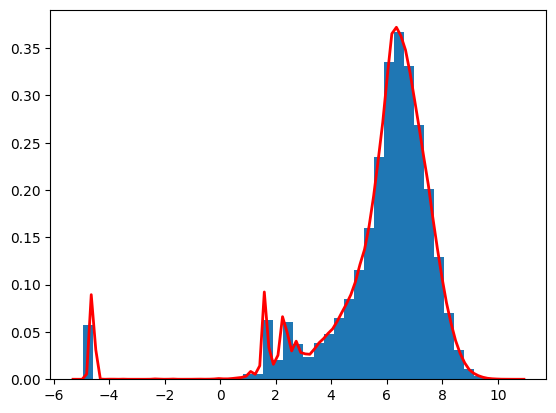

In [329]:
# Filter out negative or zero values
MT_IP_pos = data_modifiee['MT_PIECES_REPARABLE'][data_modifiee['MT_PIECES_REPARABLE'] > 0]

# Calculate the logarithm of the variable
y_log = np.log(MT_PIECES_pos)

# lot the histogram of the logarithm of the variable
plt.hist(y_log, density=True, bins=45)
plt.plot(np.linspace(y_log.min(), y_log.max(), num=100), 
         sm.nonparametric.KDEUnivariate(y_log).fit().evaluate(np.linspace(y_log.min(), y_log.max(), num=100)), 
         color='red', linewidth=2)

# Test if the variable follows a normal distribution
statistic, p_value = stats.normaltest(y_log)
print("Test du chi-deux pour l'adéquation à une loi normale:")
print("Statistic:", statistic)
print("P-value:", p_value)

plt.show()

In [328]:
# Filter out negative or zero values
MT_PIECES_pos = data_modifiee['MT_PIECES_REPARABLE'][data_modifiee['MT_PIECES_REPARABLE'] > 0]

# Effectuer le test d'adéquation de Kolmogorov-Smirnov
statistic, p_value = kstest(MT_PIECES_pos, 'invgauss', invgauss.fit(MT_PIECES_pos))

# Afficher le résultat du test
print("Test d'adéquation de Kolmogorov-Smirnov pour la loi inverse gaussienne:")
print("Statistic:", statistic)
print("P-value:", p_value)

Test d'adéquation de Kolmogorov-Smirnov pour la loi inverse gaussienne:
Statistic: 0.05396253164344794
P-value: 0.0


In [327]:
from scipy.stats import gamma

# Filter out negative or zero values
MT_PIECES_pos = data_modifiee['MT_PIECES_REPARABLE'][data_modifiee['MT_PIECES_REPARABLE'] > 0]

# Effectuer le test d'adéquation de Kolmogorov-Smirnov pour la loi gamma
statistic_gamma, p_value_gamma = kstest(MT_PIECES_pos, 'gamma', gamma.fit(MT_PIECES_pos))

# Afficher le résultat du test pour la loi gamma
print("Test d'adéquation de Kolmogorov-Smirnov pour la loi gamma:")
print("Statistic:", statistic_gamma)
print("P-value:", p_value_gamma)

Test d'adéquation de Kolmogorov-Smirnov pour la loi gamma:
Statistic: 0.9890004811690846
P-value: 0.0


In [326]:
# Filter out negative or zero values
MT_PIECES_pos = data_modifiee['MT_PIECES_REPARABLE'][data_modifiee['MT_PIECES_REPARABLE'] > 0]

# Effectuer le test d'adéquation de Kolmogorov-Smirnov pour la loi log-normale
statistic_lognorm, p_value_lognorm = kstest(MT_MO_pos, 'lognorm', lognorm.fit(MT_PIECES_pos))

# Afficher le résultat du test pour la loi log-normale
print("Test d'adéquation de Kolmogorov-Smirnov pour la loi log-normale:")
print("Statistic:", statistic_lognorm)
print("P-value:", p_value_lognorm)

Test d'adéquation de Kolmogorov-Smirnov pour la loi log-normale:
Statistic: 0.12186070560640255
P-value: 0.0
